[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE




K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?


* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [2]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

- e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연속

In [3]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202201.csv", 
                     encoding="cp949")
df_raw.shape

(450, 34)

In [4]:
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4,2021 2/4,2021 3/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,1345723,1526135,1881628,1529955,1284863,1650010,1517553,1188566,1201299,1006236
1,합계,합계,면세점,-,-,-,-,-,-,-,...,1157158,1336372,1655635,1297490,1051987,1410967,1247495,972384,974415,795815
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,188565,189763,225993,232465,232876,239043,270058,216182,226884,210421
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,4038,3670,3827,4142,3814,7716,3583,4235,4448,3589
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,1,70,113,0,3497,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,488,308,531,384,334,353,391,338,293,369
447,기타,기 타,계,765,735,849,804,788,805,724,...,689,469,1094,939,710,826,870,870,1278,1166
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,1,0,1,0,0,0,0,0,0,0


In [5]:
# "국가(대륙)별 " 데이터로 그룹화 후 빈도수 세기
# 45개씩 들어있습니다. 45 * 10 

df_raw["국가(대륙)별"].value_counts()

아세안(ASEAN)    45
기타            45
중남미           45
대양주           45
유럽연합(EU)      45
미국            45
일본            45
중동            45
중국            45
합계            45
Name: 국가(대륙)별, dtype: int64

In [6]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4,2021 2/4,2021 3/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,44973,55512,54054,49155,66057,67693,72531,66699,67298,65865
46,미국,합계,면세점,-,-,-,-,-,-,-,...,2951,1818,1481,698,339,81,67,56,1742,100
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,42022,53694,52573,48457,65718,67612,72464,66643,65556,65765
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1408,1653,1383,1182,1631,1866,1368,1640,2116,1518
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기 **
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf



집계를 한 데이터를 tidy data 형식으로 만들어야 합니다.






### melt () 함수


- melt를 사용해보겠습니다. 
- melt는 행에 있는 데이터를 열로 옮기는 것입니다.

In [7]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df.shape

(13950, 5)

In [8]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [9]:
# 연도와 분기를 분리하고, 숫자로 변경해야 합니다.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13950 entries, 0 to 13949
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  13950 non-null  object
 1   상품군별     13950 non-null  object
 2   판매유형별    13950 non-null  object
 3   기간       13950 non-null  object
 4   million  13950 non-null  object
dtypes: object(5)
memory usage: 545.0+ KB


## 데이터 전처리 
- 문자열 분리하고 데이터 타입 변경하기


### 기간에서 연도를 분리하기

In [10]:
# 2014년부터 2021년 분기별 데이터 

df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
13945    2021 3/4 p)
13946    2021 3/4 p)
13947    2021 3/4 p)
13948    2021 3/4 p)
13949    2021 3/4 p)
Name: 기간, Length: 13950, dtype: object

In [11]:

# 문자열 공백 기준 > 문자열 리스트로 변환 > 0번째 인덱스 반환 > str to int

"2019 4/4 p".split()
"2019 4/4 p".split()[0] 
int("2019 4/4 p".split()[0])


2019

### map

- map은 안에 함수를 넣을 수 있습니다.



In [12]:
# map안에 lambda 함수를 넣어 x.split()한 데이터의 첫번째 인덱스 값을 integer 형으로 변경합니다.
# df에 "연도 "라는 new 열을 추가합니다.

df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
13945,기타,생활용품 및 자동차용품,면세점,2021 3/4 p),0,2021
13946,기타,생활용품 및 자동차용품,면세점 이외,2021 3/4 p),369,2021
13947,기타,기 타,계,2021 3/4 p),1166,2021
13948,기타,기 타,면세점,2021 3/4 p),0,2021


### 기간에서 분기를 분리하기

In [13]:
# 공백을 기준으로 데이터를 split한 후, 4/4에 '/'기준으로 4와 4를 분리합니다.
# 4/4에 있는 앞의 4를 가져와 int 로 변경 합니다.



int("2019 4/4 p)".split()[1].split("/")[0])

4

In [14]:
# 이번에는 "분기" 열을 만들어보겠습니다.

df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))

### astype

- 데이터 타입 변경

In [15]:
# object data
df["분기"] = df["기간"].apply(lambda  x : x.split()[1].split("/")[0])

# dtype 변경
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13950 entries, 0 to 13949
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  13950 non-null  object
 1   상품군별     13950 non-null  object
 2   판매유형별    13950 non-null  object
 3   기간       13950 non-null  object
 4   million  13950 non-null  object
 5   연도       13950 non-null  int64 
 6   분기       13950 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 763.0+ KB


### replace ( "-", np.nan )


- 2016년 이전 데이터는 결측치가 많고, -으로 기록되어 있습니다. 
- -로 표시된 값은 결측치이므로 numpy를 로드하여 np.nan을 사용하여 NaN으로 대치(replace) 합니다.



In [17]:
import numpy as np

In [18]:
# astype(float)를 활용하여 데이터를 float 데이터 형태를 확인할 수 있습니다.
# -은 NaN으로 변경하였고, 숫자는 소숫점으로 변경하였습니다.

# replace()한 값을 million" 열에 덮어쓰기합니다.

df["million"] = df["million"].replace("-", np.nan).astype(float)
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13945,기타,생활용품 및 자동차용품,면세점,2021 3/4 p),0.0,2021,3
13946,기타,생활용품 및 자동차용품,면세점 이외,2021 3/4 p),369.0,2021,3
13947,기타,기 타,계,2021 3/4 p),1166.0,2021,3
13948,기타,기 타,면세점,2021 3/4 p),0.0,2021,3


### 필요없는 데이터 제거하기

In [19]:
# 데이터셋의 용량은 약 763KB입니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13950 entries, 0 to 13949
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  13950 non-null  object 
 1   상품군별     13950 non-null  object 
 2   판매유형별    13950 non-null  object 
 3   기간       13950 non-null  object 
 4   million  10350 non-null  float64
 5   연도       13950 non-null  int64  
 6   분기       13950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 763.0+ KB


In [20]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.

df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13945,기타,생활용품 및 자동차용품,면세점,2021 3/4 p),0.0,2021,3
13946,기타,생활용품 및 자동차용품,면세점 이외,2021 3/4 p),369.0,2021,3
13947,기타,기 타,계,2021 3/4 p),1166.0,2021,3
13948,기타,기 타,면세점,2021 3/4 p),0.0,2021,3


In [21]:
# 데이터셋의 용량을 약 732KB 로 줄였습니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11718 entries, 48 to 13949
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  11718 non-null  object 
 1   상품군별     11718 non-null  object 
 2   판매유형별    11718 non-null  object 
 3   기간       11718 non-null  object 
 4   million  8694 non-null   float64
 5   연도       11718 non-null  int64  
 6   분기       11718 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 732.4+ KB


### 결측치

In [22]:
# million 에 결측치가 있습니다. 
# 금액이 없는 데이터도 있다는 것을 참고합니다.

df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화

### 전체 상품군별 데이터로 연도별 증가추세 시각화

- NaN으로 표시된 결측치 데이터가 있으면 시각화가 잘 안나타날 수 있으므로,
- NaN으로 나타난 행의 데이터를 제거하고 시각화를 해보겠습니다.



In [23]:
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13945,기타,생활용품 및 자동차용품,면세점,2021 3/4 p),0.0,2021,3
13946,기타,생활용품 및 자동차용품,면세점 이외,2021 3/4 p),369.0,2021,3
13947,기타,기 타,계,2021 3/4 p),1166.0,2021,3
13948,기타,기 타,면세점,2021 3/4 p),0.0,2021,3


In [24]:
# NaN 이 없는 판매유형별 계 데이터만 추출 

df_total = df[df["판매유형별"] == "계"].copy()

In [25]:
# 결측치 확인

df_total.isnull().sum()

국가(대륙)별    0
상품군별       0
판매유형별      0
기간         0
million    0
연도         0
분기         0
dtype: int64

<AxesSubplot:xlabel='연도', ylabel='million'>

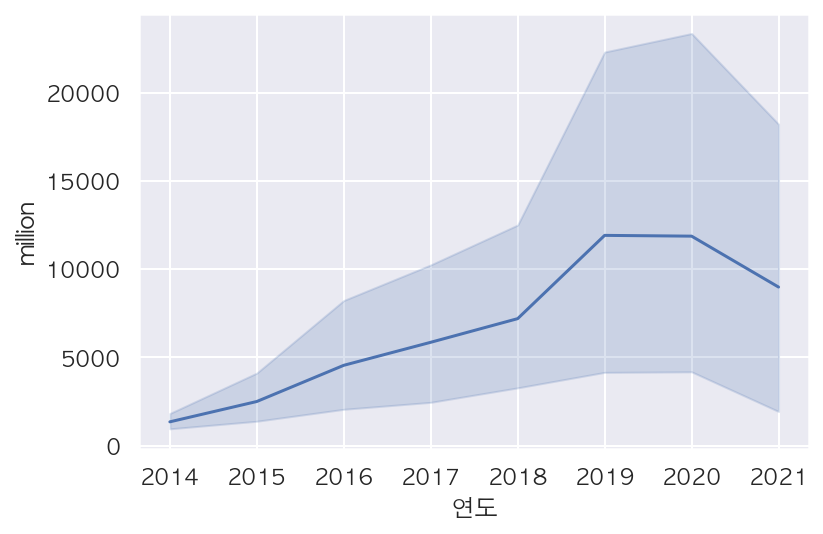

In [26]:
# 연도에 따른 판매액을 lineplot 

sns.lineplot(data=df_total, x="연도", y="million")

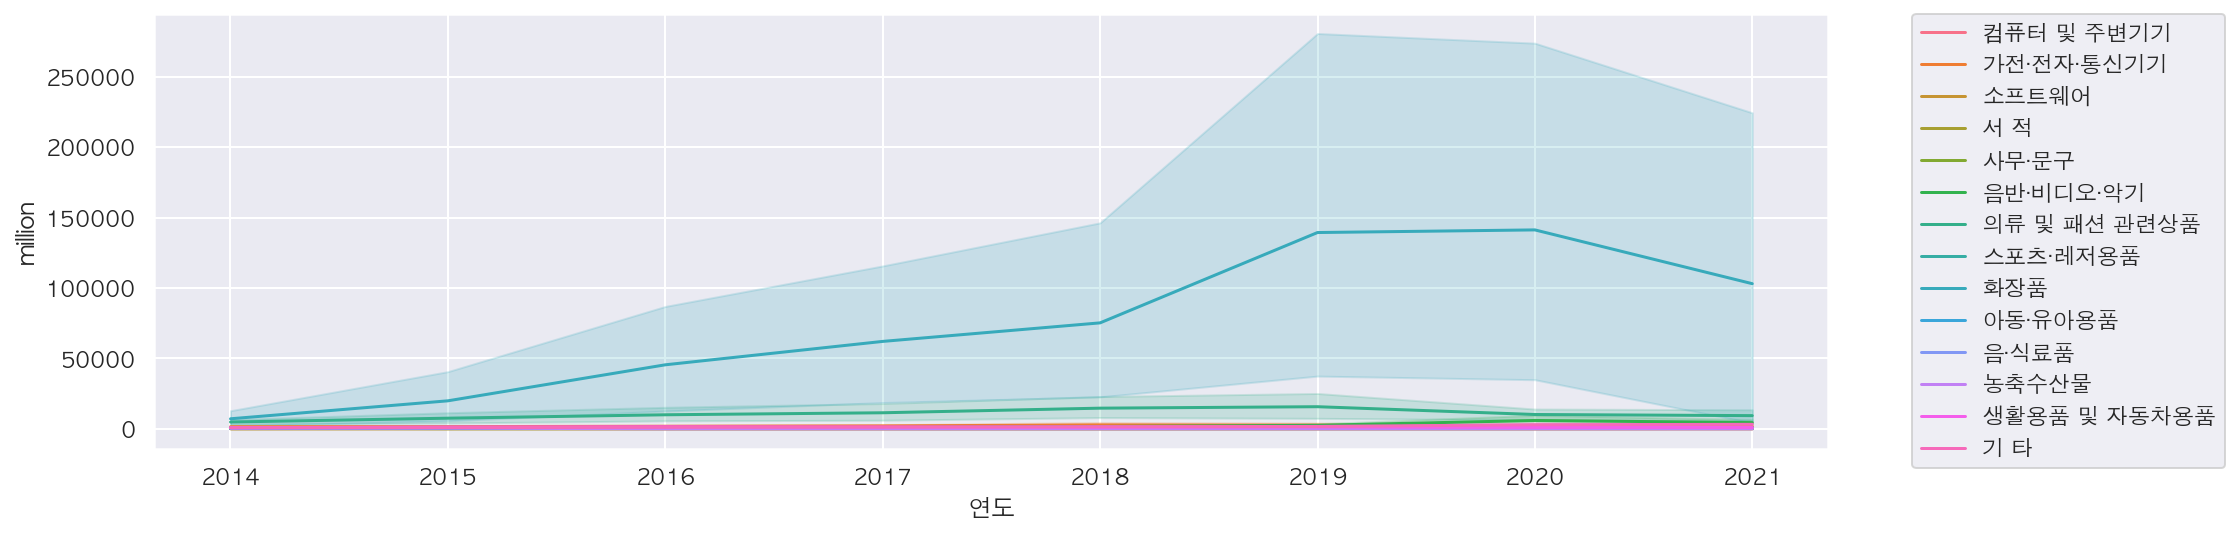

In [27]:
# 연도별 판매액 / 상품군 별로 다른 색상으로 시각화
# legend 값을 밖에 표시하는 소스코드를 stack overflow에서 가져옵니다.

plt.figure(figsize=(15, 4))

sns.lineplot(x="연도", y="million", data=df_total, hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


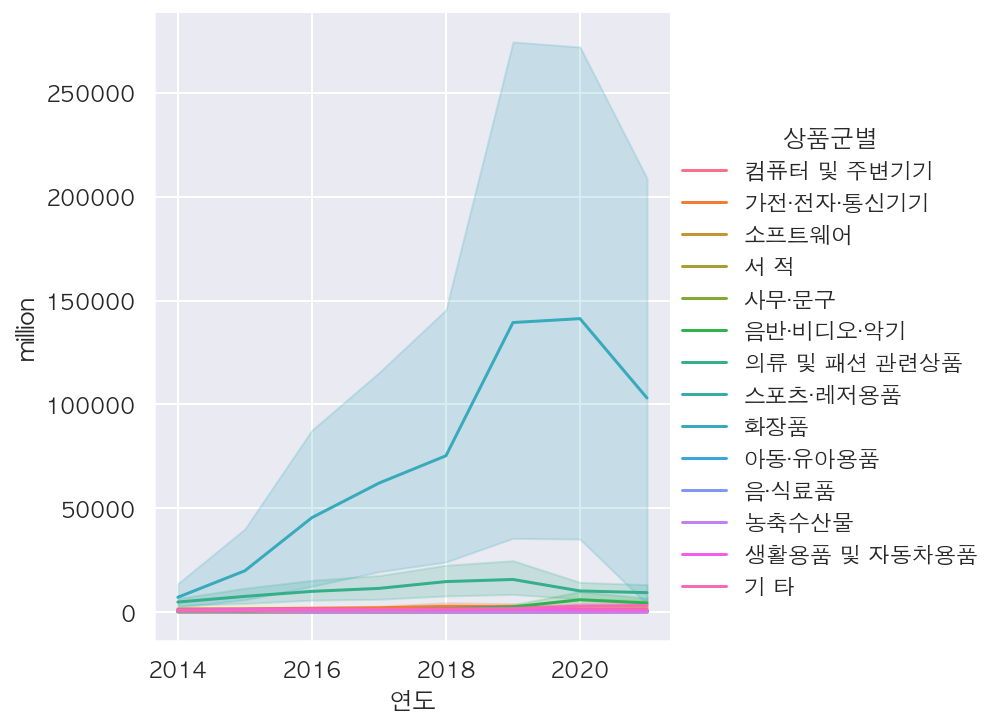

In [28]:
# relplot을 lineplot의 서브플롯을 그리기 위해 사용하겠습니다.
# kind를 "line"으로 설정합니다.


sns.relplot(x="연도", y="million", data=df_total, hue="상품군별", kind="line")

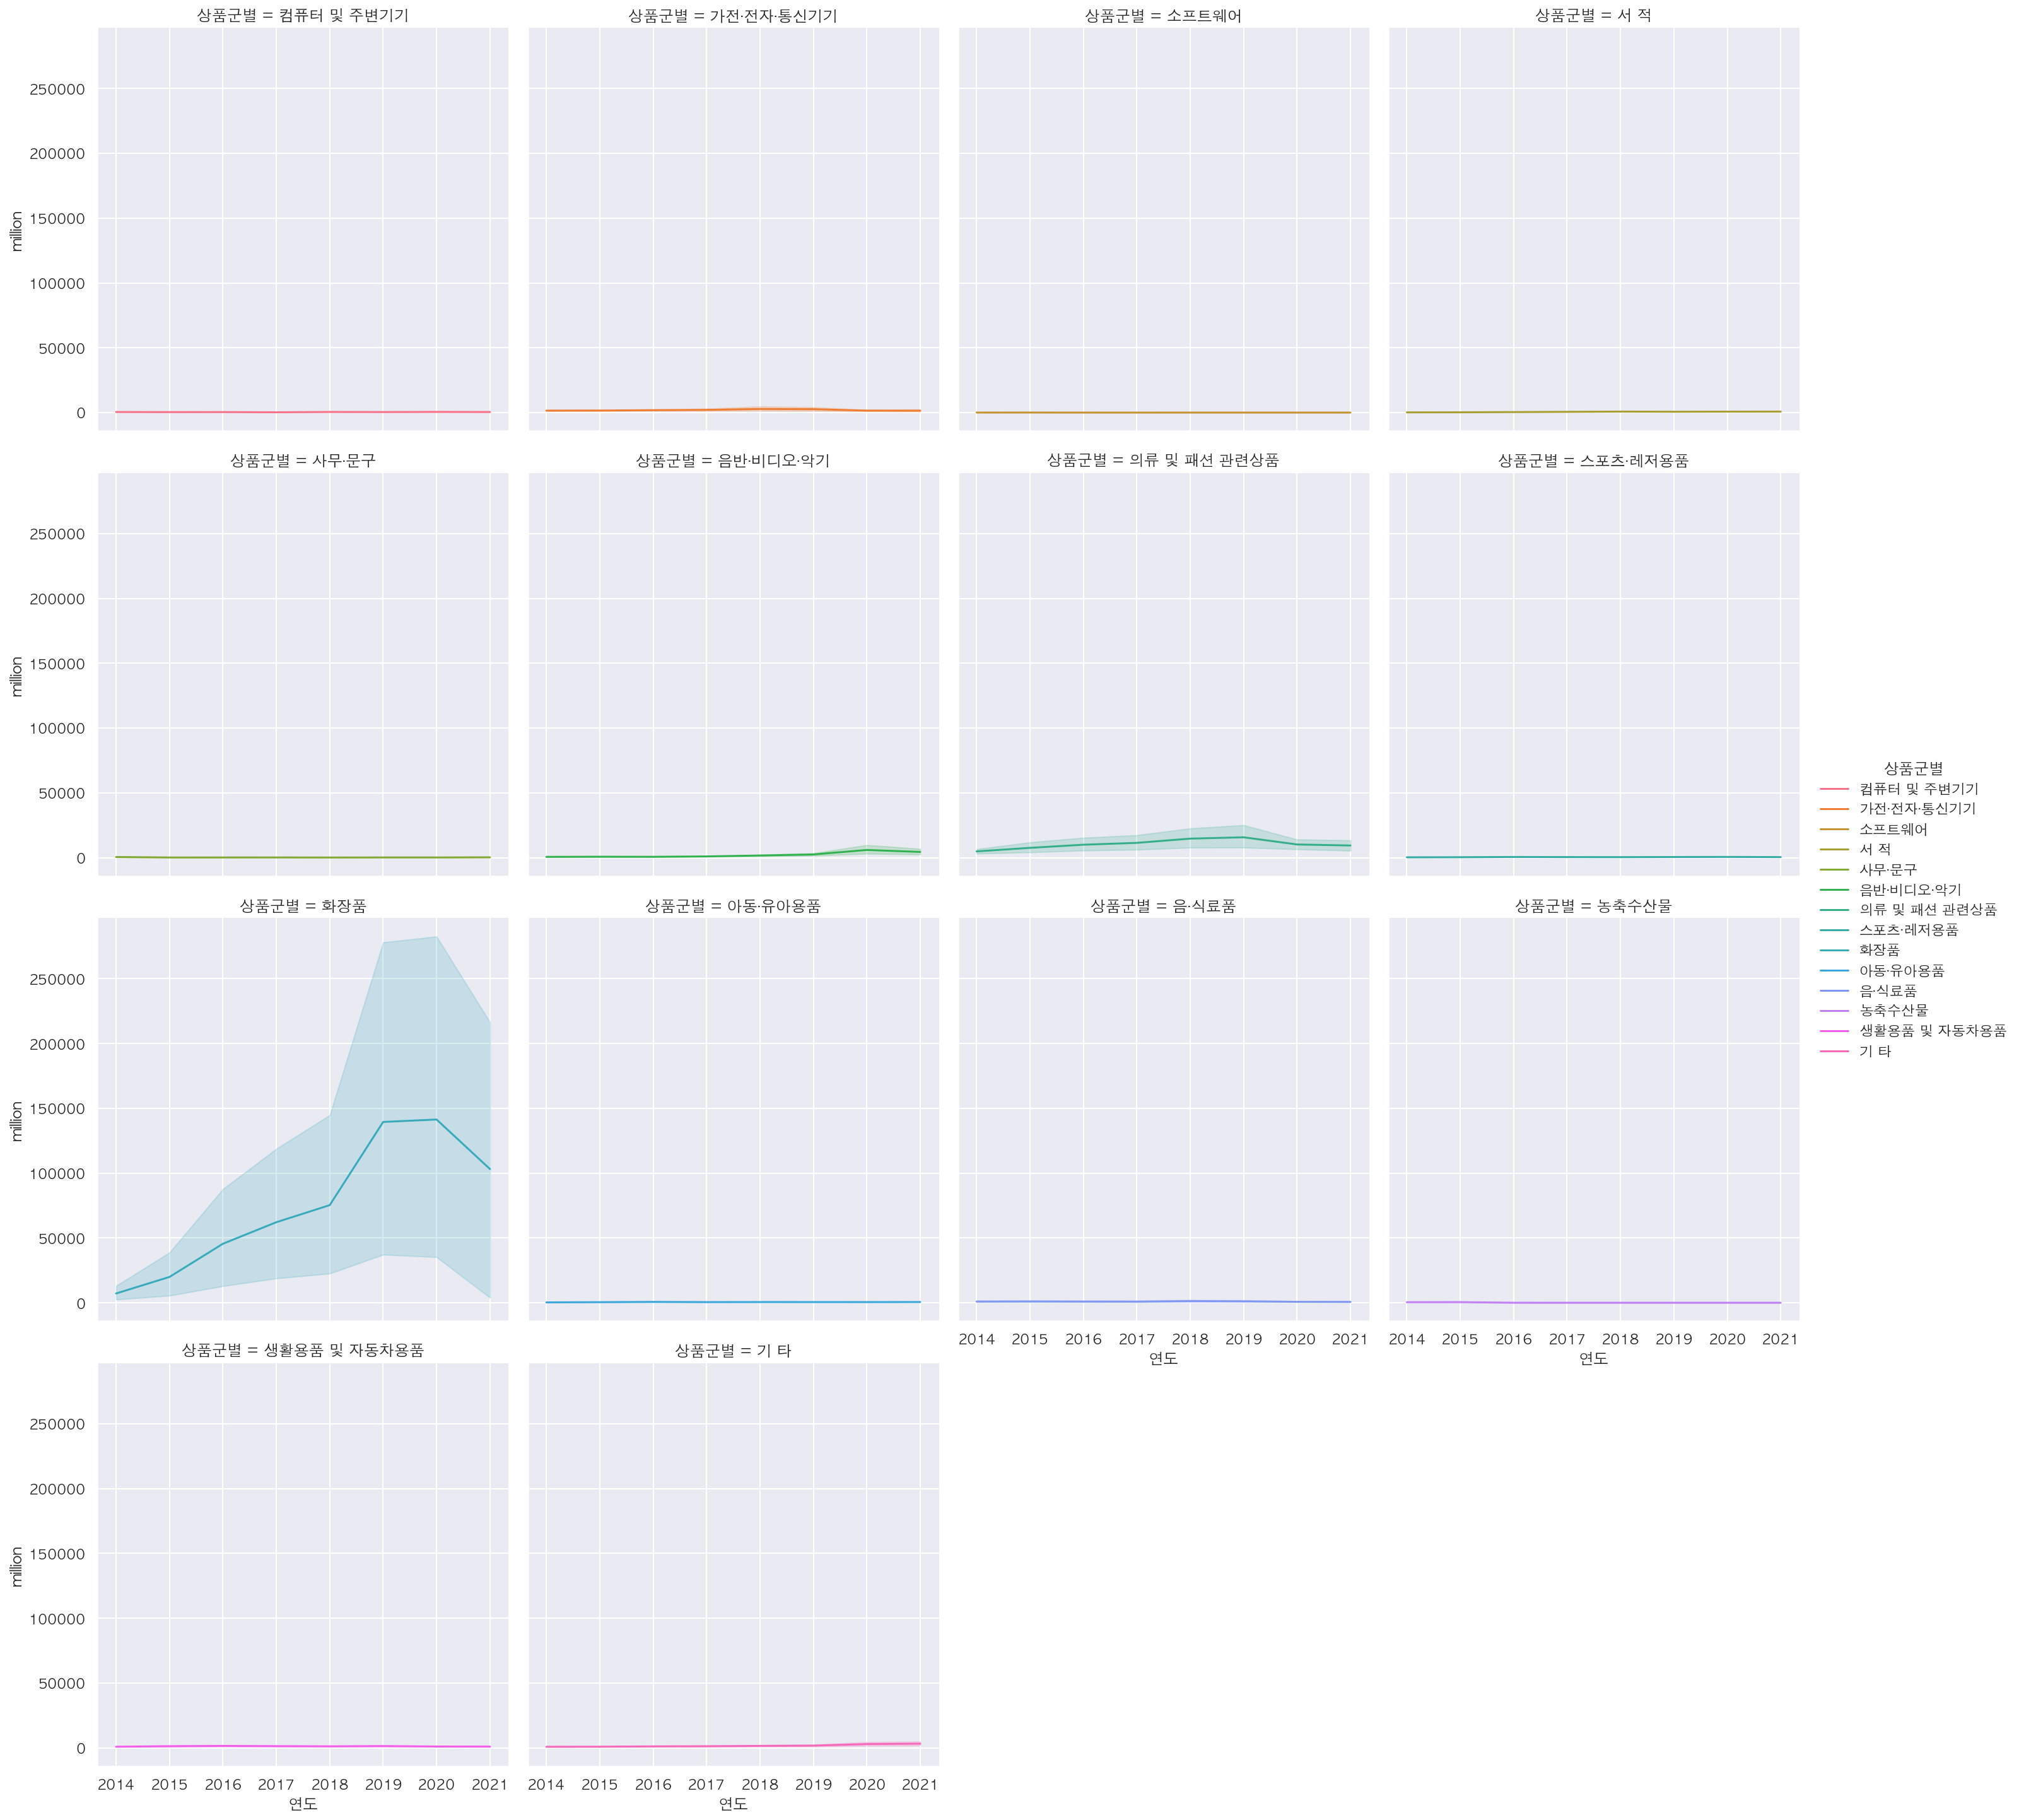

In [29]:
# 상품군별로 색상을 다르게 하기 위해 col 옵션을 활용하고, 한 행에 4개를 표시하기 위해 col_wrap 옵션을 사용합니다.
# kind의 기본값이 scatter이므로 line으로 바꿔줍니다.

sns.relplot(x="연도", y="million", data=df_total, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

- __result__ 

    - 화장품이 다른 상품군들에 비해 해외직접판매액이 꾸준히 증가하다 감소 하는것 을 알 수 있습니다. 



In [30]:
# 다른 값들은 잘 안나타나므로 화장품을 빼고 보겠습니다.

# ~를 사용하면 데이터가 반전됩니다. 
# 상품군별이 "화장품 "인 데이터만 빼고 df_sub 변수에 담습니다.


df_sub =  df[~df["상품군별"].isin(["화장품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13945,기타,생활용품 및 자동차용품,면세점,2021 3/4 p),0.0,2021,3
13946,기타,생활용품 및 자동차용품,면세점 이외,2021 3/4 p),369.0,2021,3
13947,기타,기 타,계,2021 3/4 p),1166.0,2021,3
13948,기타,기 타,면세점,2021 3/4 p),0.0,2021,3


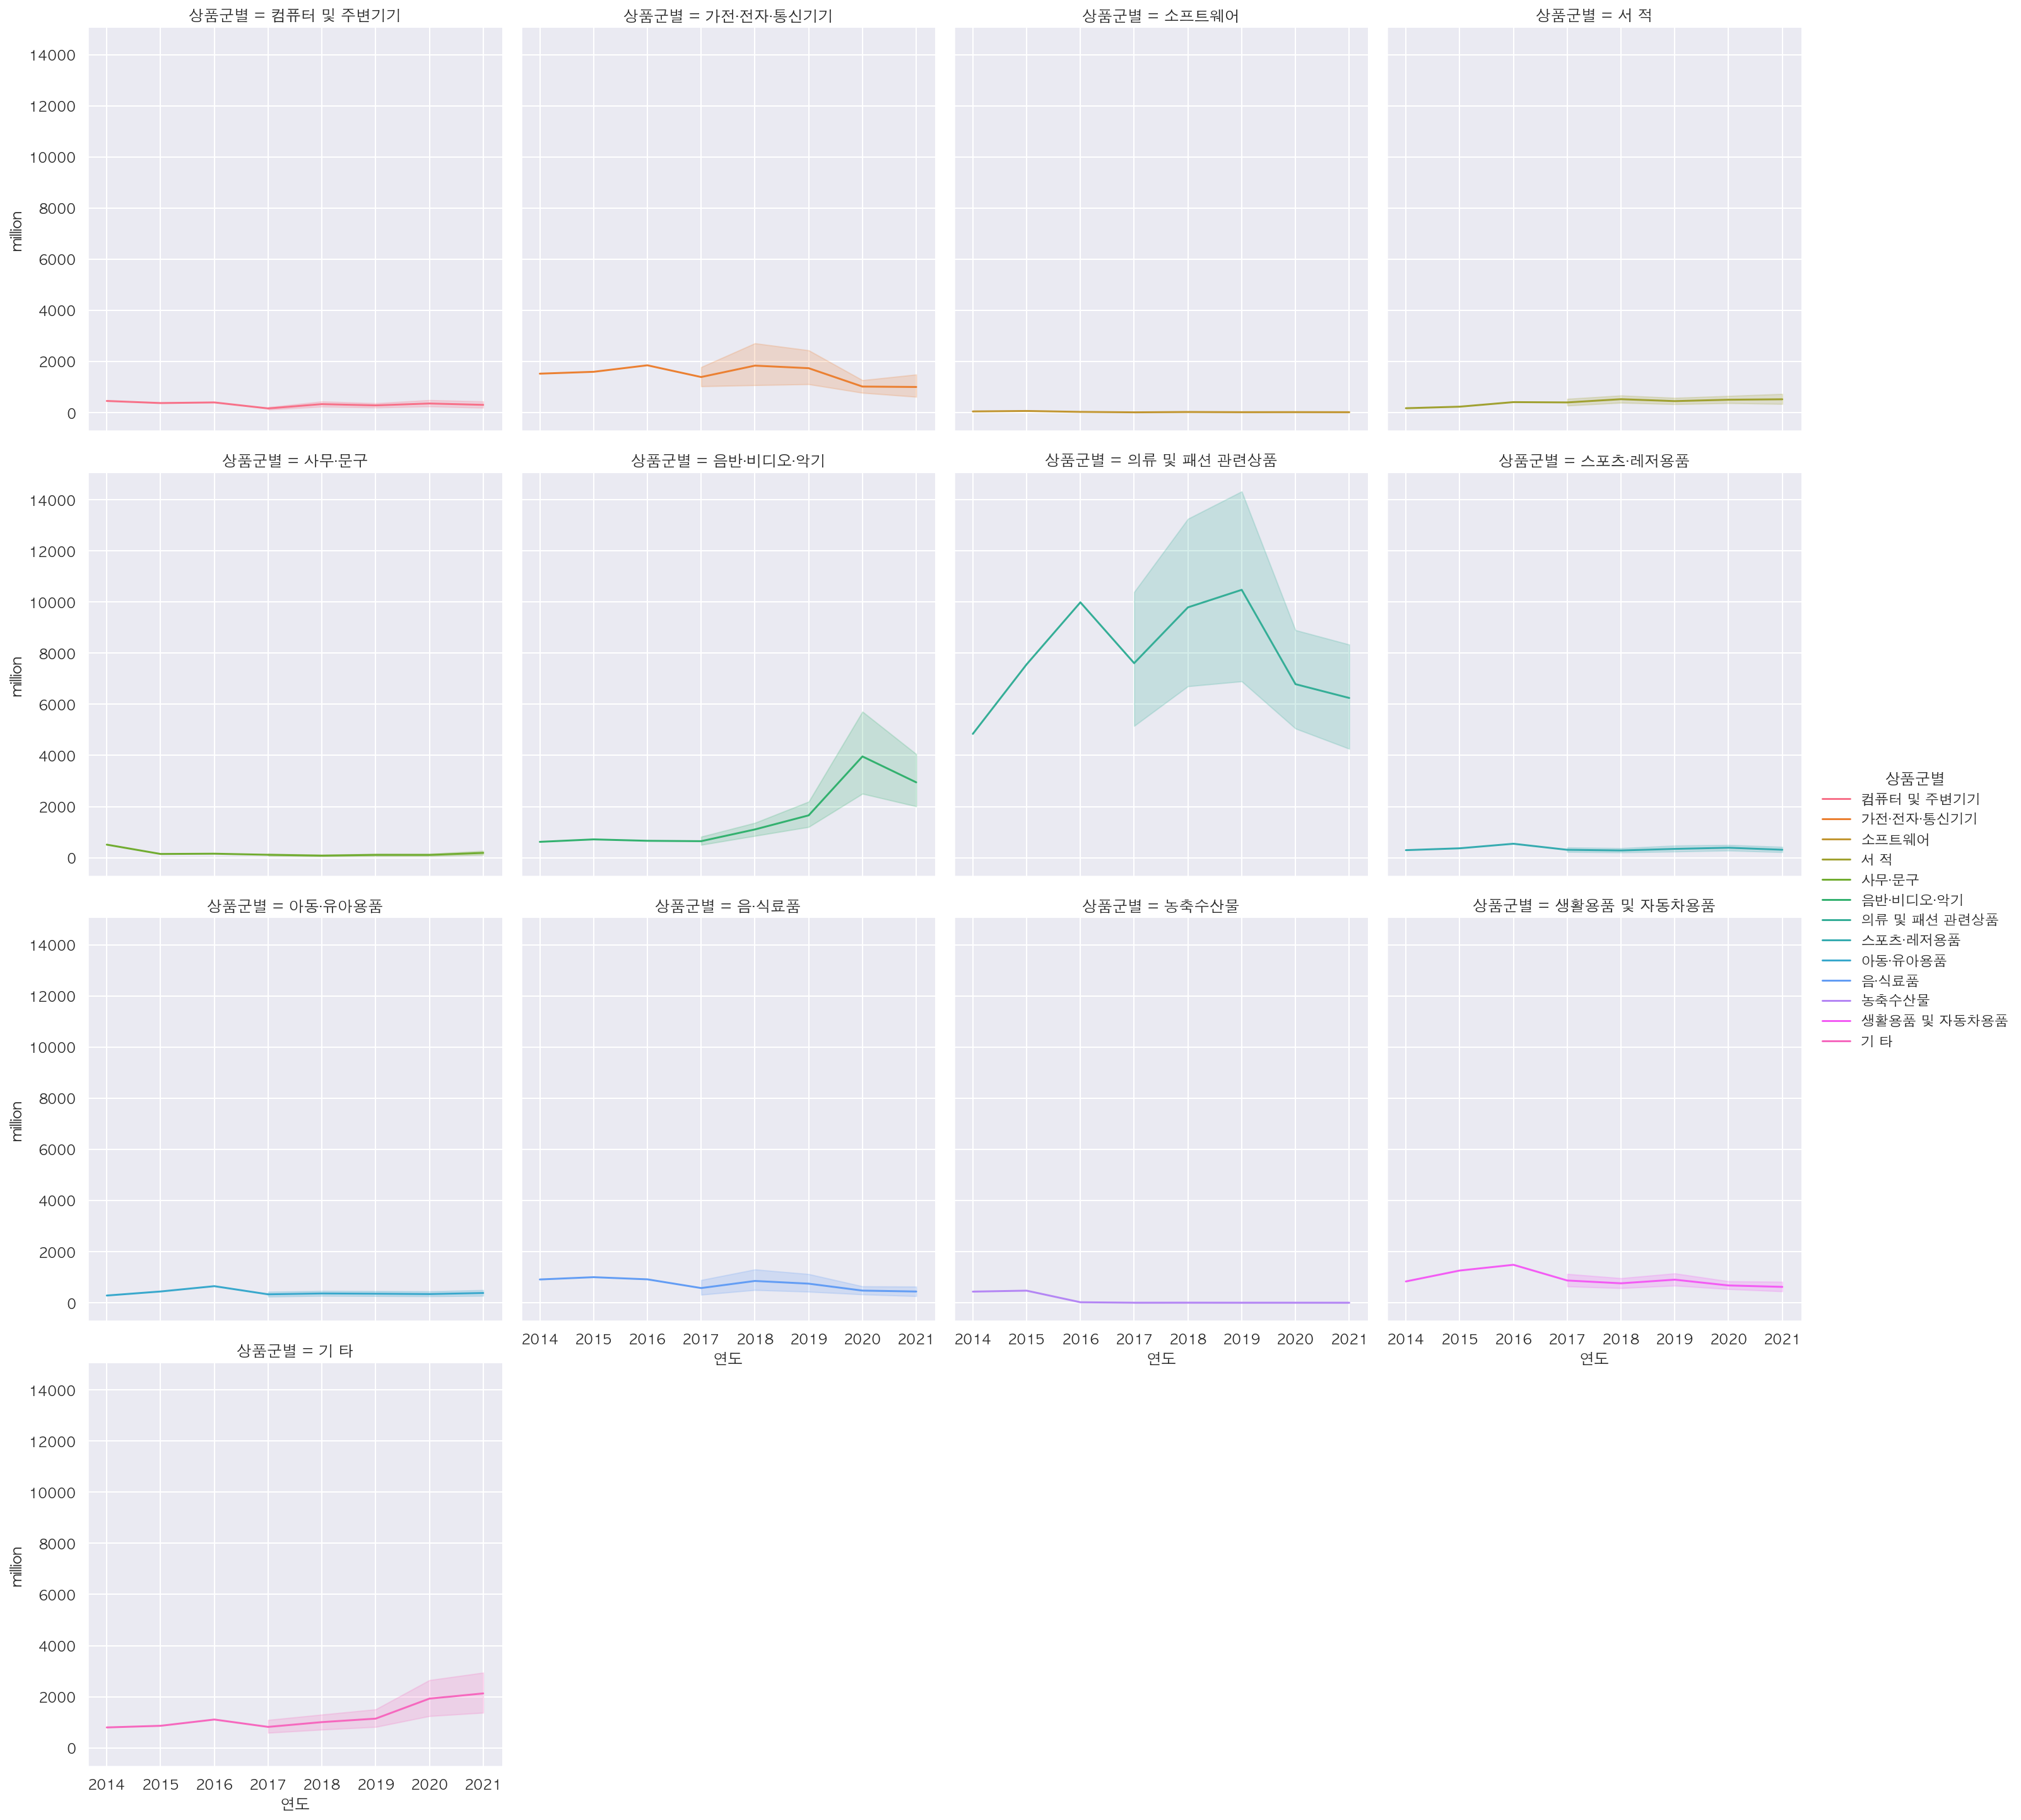

In [31]:
# 상품군별이 "화장품 "인 데이터만 빼고 시각화
# kind의 기본값이 scatter이므로 line으로 바꿔줍니다. 

sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

- __result__ 
    - 의류, 패션 상품도 많이 판매함을 알 수 있습니다. 
    - 음반 비디오 악기 쪽도 성장세 와 하락세 가 있음을 알 수 있습니다.

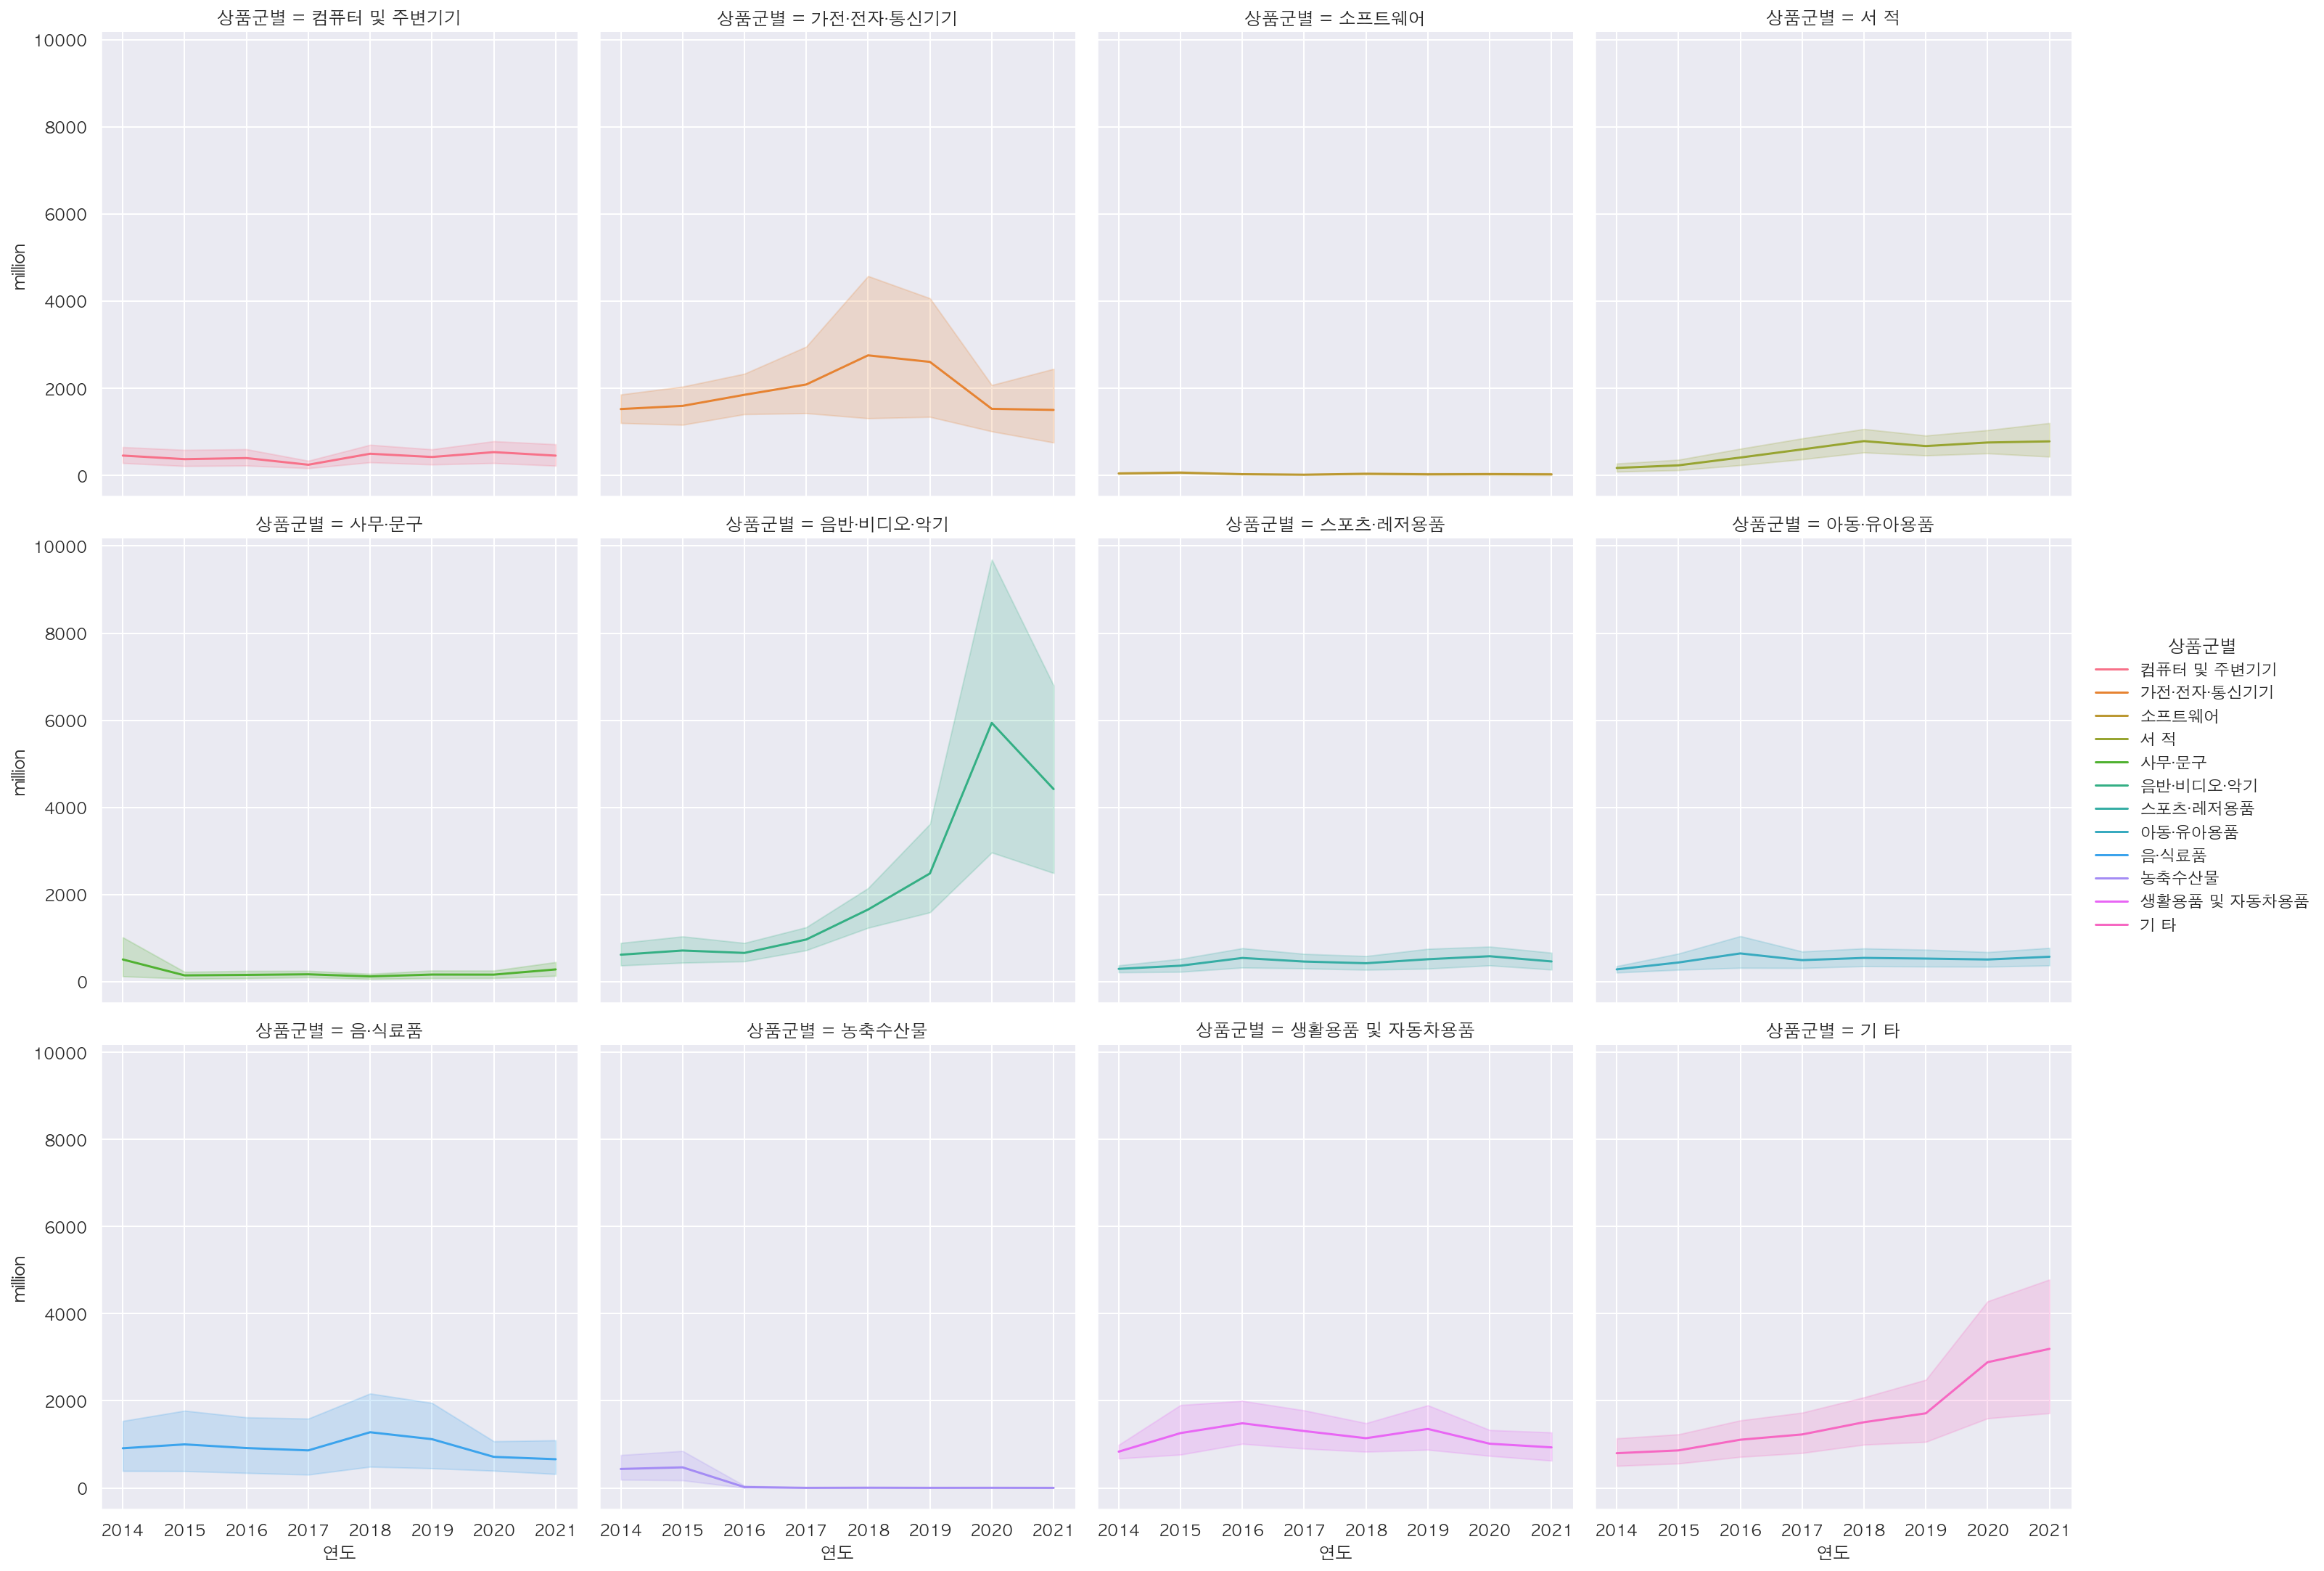

In [32]:
# 의류, 패션 상품도 빼고 나니 가전고 음반 쪽 판매가 두드러지게 나타납니다.


df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()

sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 연도별 / 분기별 화장품 판매액 데이터 시각화


In [33]:
# 화장품 데이터를 가져오기 위해 우선 boolean 식을 만들어 상품군별이 화장품인 데이터를 가져옵니다.
# copy()로 복사하지 않으면 원본 데이터에 영향을 미칠 수 있습니다.


df_cosmetic = df[(df["상품군별"] == "화장품")].copy()
df_cosmetic


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
73,미국,화장품,면세점,2014 1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014 1/4,NaN,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
118,중국,화장품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13888,대양주,화장품,면세점,2021 3/4 p),0.0,2021,3
13889,대양주,화장품,면세점 이외,2021 3/4 p),482.0,2021,3
13932,기타,화장품,계,2021 3/4 p),4459.0,2021,3
13933,기타,화장품,면세점,2021 3/4 p),3424.0,2021,3


In [34]:
# "상품군별" 컬럼에 어떤 값들이 들어있는지 unique()로 확인하여, 화장품만 있는 것을 확인할 수 있습니다.

df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='million'>

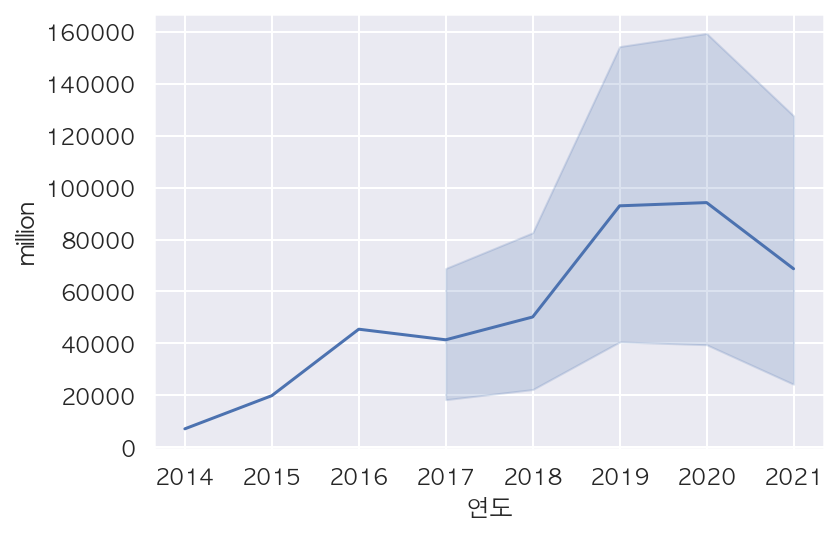

In [35]:
# 2020년까지 성장세  2020 ~ 2021 에서 하락세

sns.lineplot(data=df_cosmetic, x="연도", y="million")


<AxesSubplot:xlabel='연도', ylabel='million'>

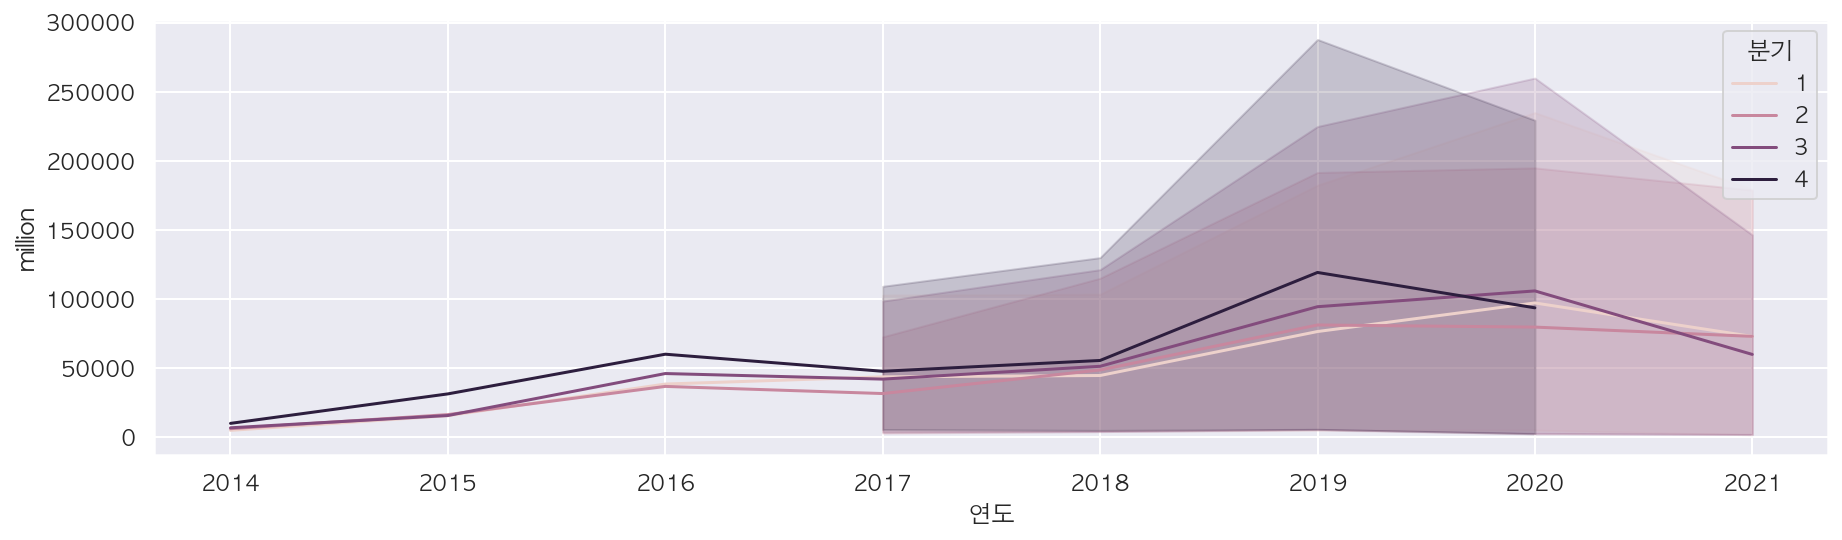

In [36]:
# 연도별 / 분기별로 살펴보겠습니다.
# 1분기 ~ 4분기 비슷한 경향

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

### 기간별 화장품 판매액 데이터 시각화


<AxesSubplot:xlabel='기간', ylabel='million'>

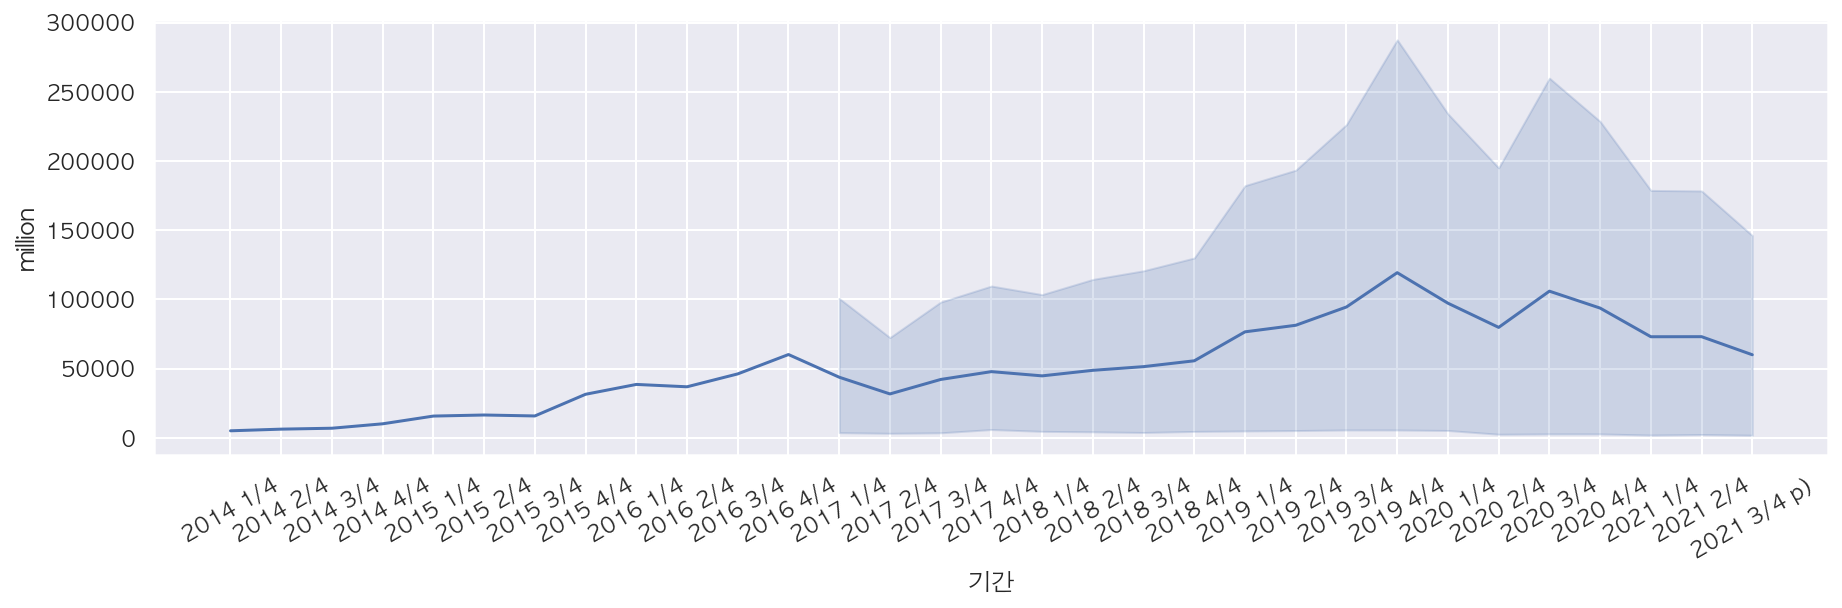

In [37]:
# 이번에는 연도가 아닌 기간으로 그래프를 그려보겠습니다.
# 글씨를 겹쳐지지 않게 하기 위해 xticks()를 사용하여 글자를 회전시킵니다.

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)

sns.lineplot(data=df_cosmetic, x="기간", y="million")

In [38]:
# 국가, 대륙 별로 한번 출력해보기로 하고, df_cosmetic 데이터 프레임을 살펴봅니다.

df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
73,미국,화장품,면세점,2014 1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014 1/4,NaN,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
118,중국,화장품,면세점,2014 1/4,NaN,2014,1


<AxesSubplot:xlabel='기간', ylabel='million'>

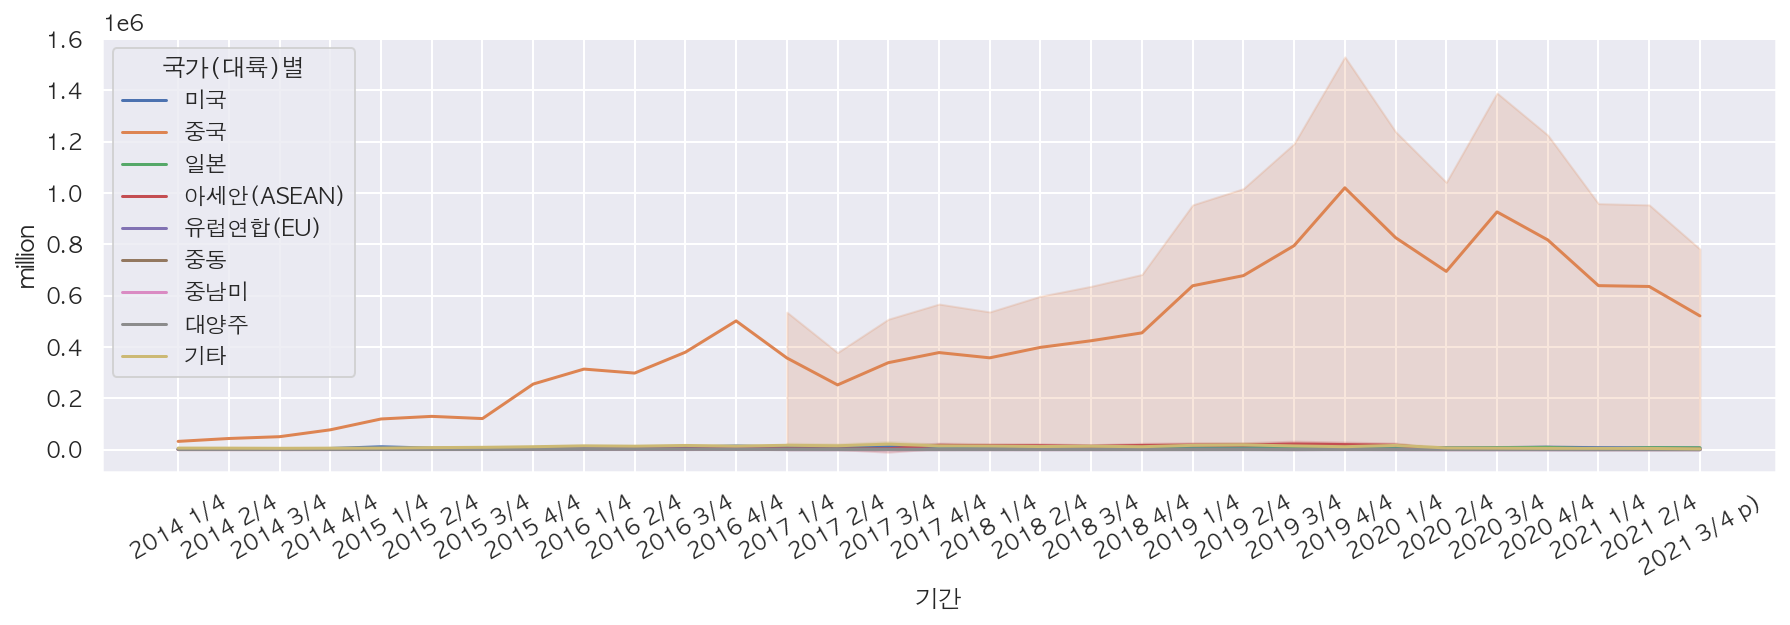

In [39]:
# 중국에서의 가장 판매액이 높습니다.

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)

sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

In [40]:
df_cosmetic["국가(대륙)별"]

72        미국
73        미국
74        미국
117       중국
118       중국
        ... 
13888    대양주
13889    대양주
13932     기타
13933     기타
13934     기타
Name: 국가(대륙)별, Length: 837, dtype: object

<AxesSubplot:xlabel='기간', ylabel='million'>

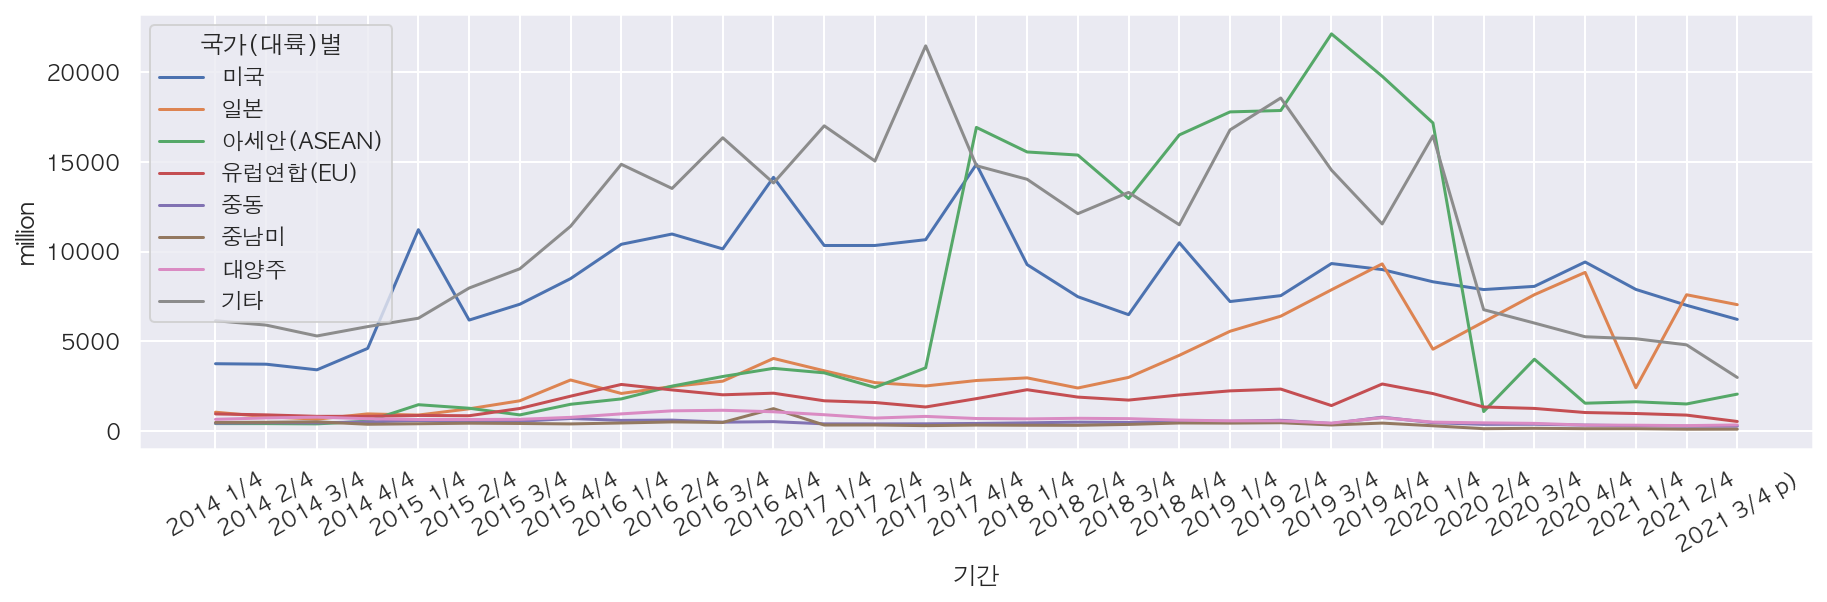

In [41]:
# 중국을 빼고 시각화 그래프를 그리면 아세안에서 최근 높은 판매량을 기록했음을 알 수 있습니다.

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)

sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="million", hue="국가(대륙)별",ci=None)

<AxesSubplot:xlabel='기간', ylabel='million'>

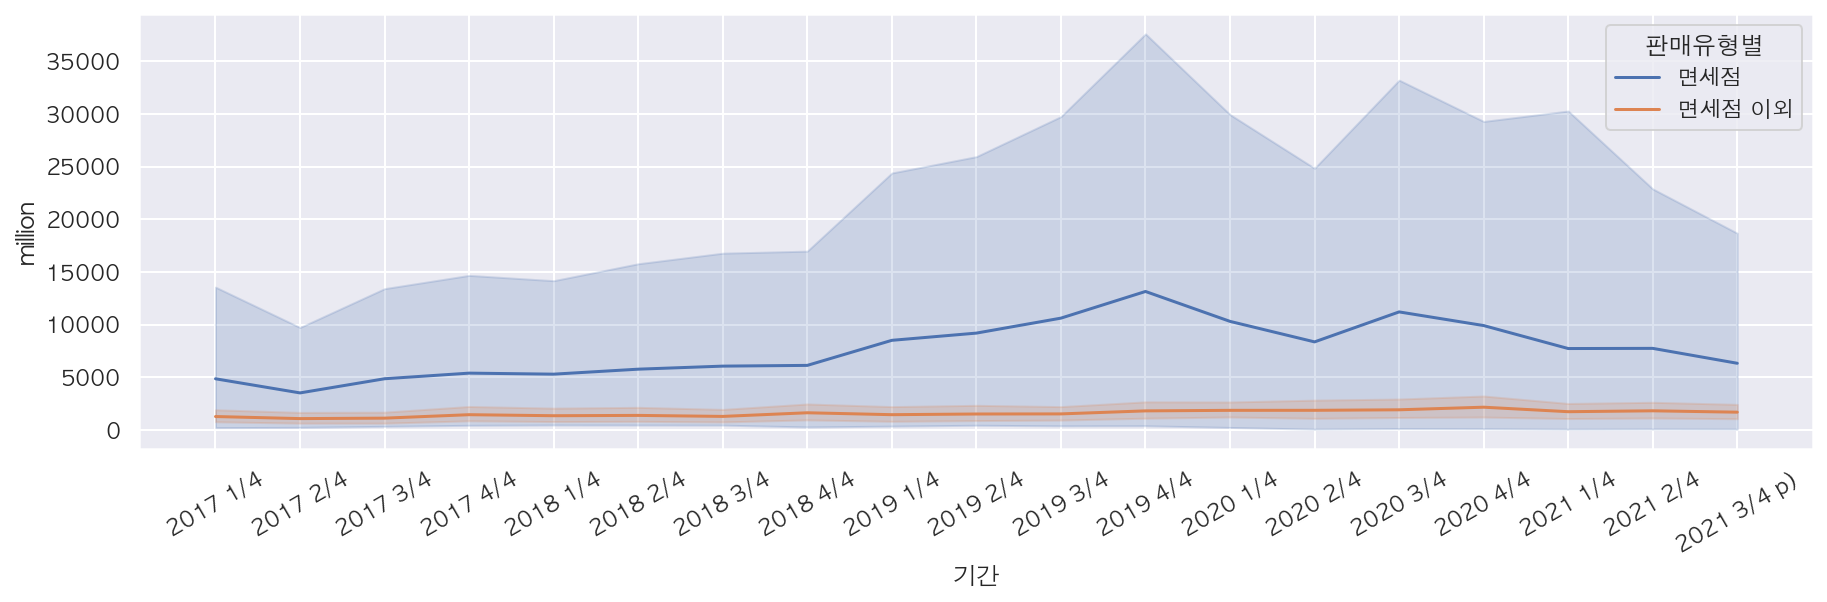

In [42]:
# "계" 데이터를 제외후 시각화


plt.figure(figsize=(15,4))
plt.xticks(rotation=30)

df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="million", hue="판매유형별")

- __result__
    
    - 면세점이 성장세 2019 4/4 이후 하락세 하고 있다는 사실을 알 수 있습니다.

<AxesSubplot:xlabel='기간', ylabel='million'>

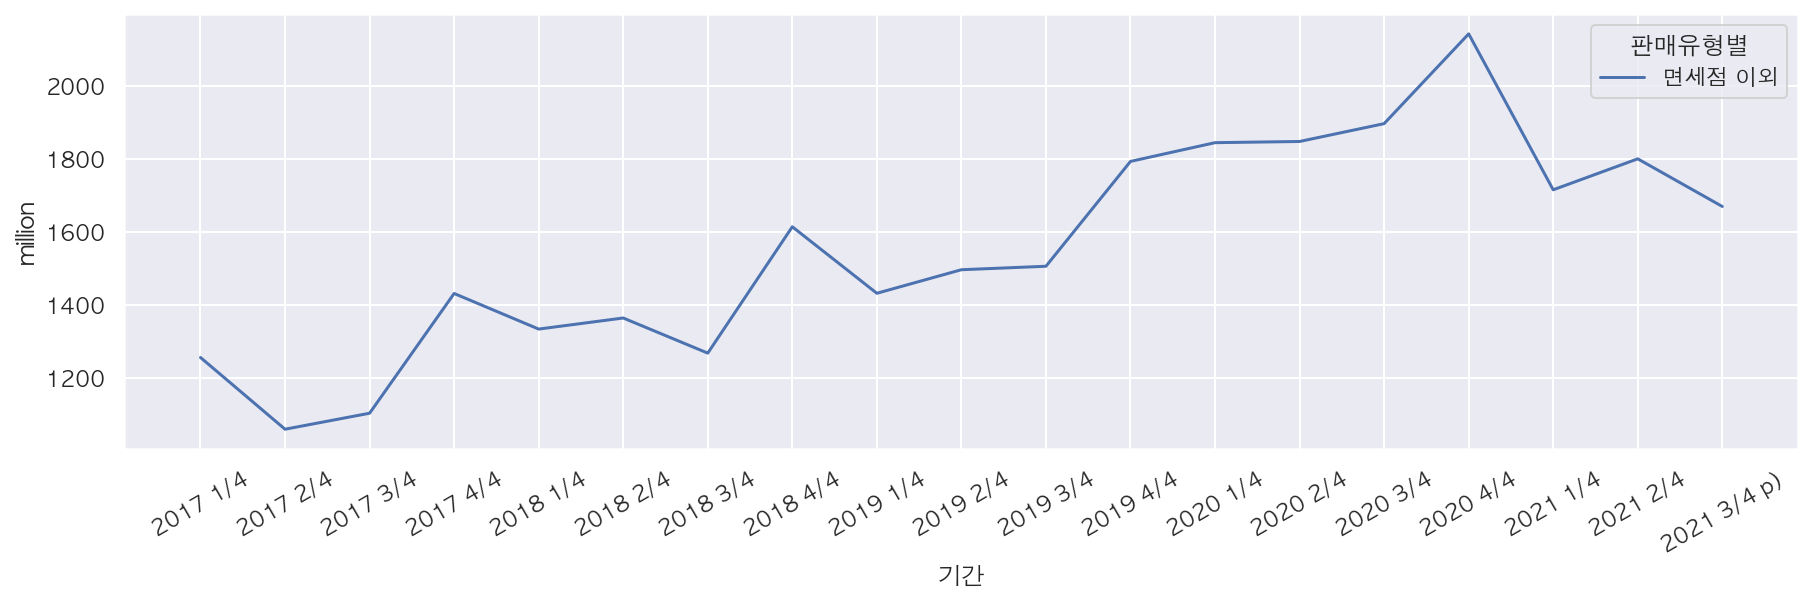

In [43]:
# 계 + 온라인 면세점도 빼고 시각화
# 증가후 감소 추세

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)

df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="million", hue="판매유형별", ci=None)

- __result__
    
    - '면세점 이외'도 성장세 2019 4/4 이후 하락세 하고 있다는 사실을 알 수 있습니다.

### 의류 및 패션관련 상품 온라인쇼핑 해외 직접 판매액 시각화

In [44]:
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13945,기타,생활용품 및 자동차용품,면세점,2021 3/4 p),0.0,2021,3
13946,기타,생활용품 및 자동차용품,면세점 이외,2021 3/4 p),369.0,2021,3
13947,기타,기 타,계,2021 3/4 p),1166.0,2021,3
13948,기타,기 타,면세점,2021 3/4 p),0.0,2021,3


In [45]:
# "판매유형별"이 "계"인 데이터를 df_fashion에 추가

df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()


<AxesSubplot:title={'center':'의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

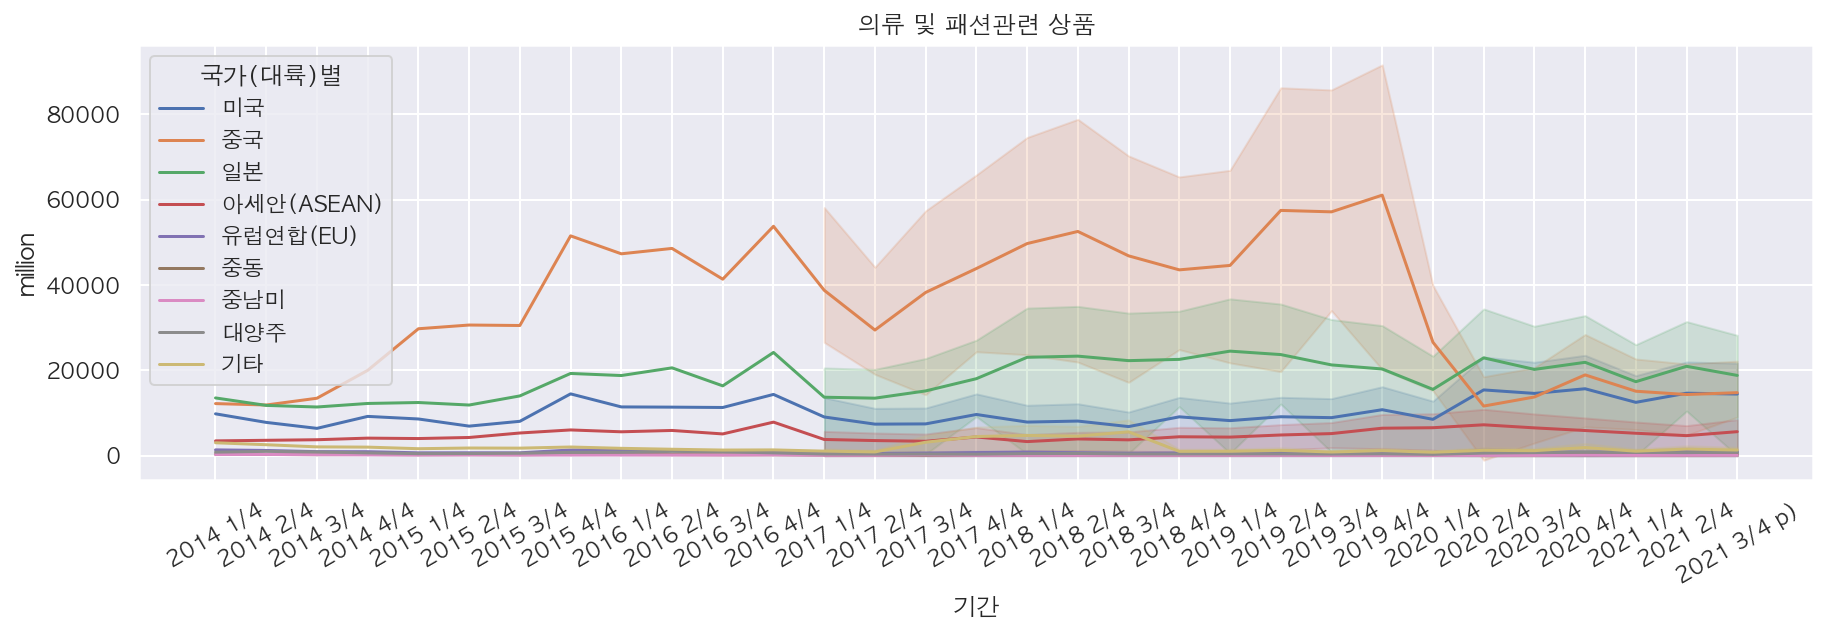

In [46]:
# 기간별 금액 데이터를 시각화하고, 국가(대륙별)을 색상으로 표시

df_fashion = df[df["상품군별"].str.contains("의류")].copy()


plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)

sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

- __result__
    - 성장후 감소

<AxesSubplot:xlabel='기간', ylabel='million'>

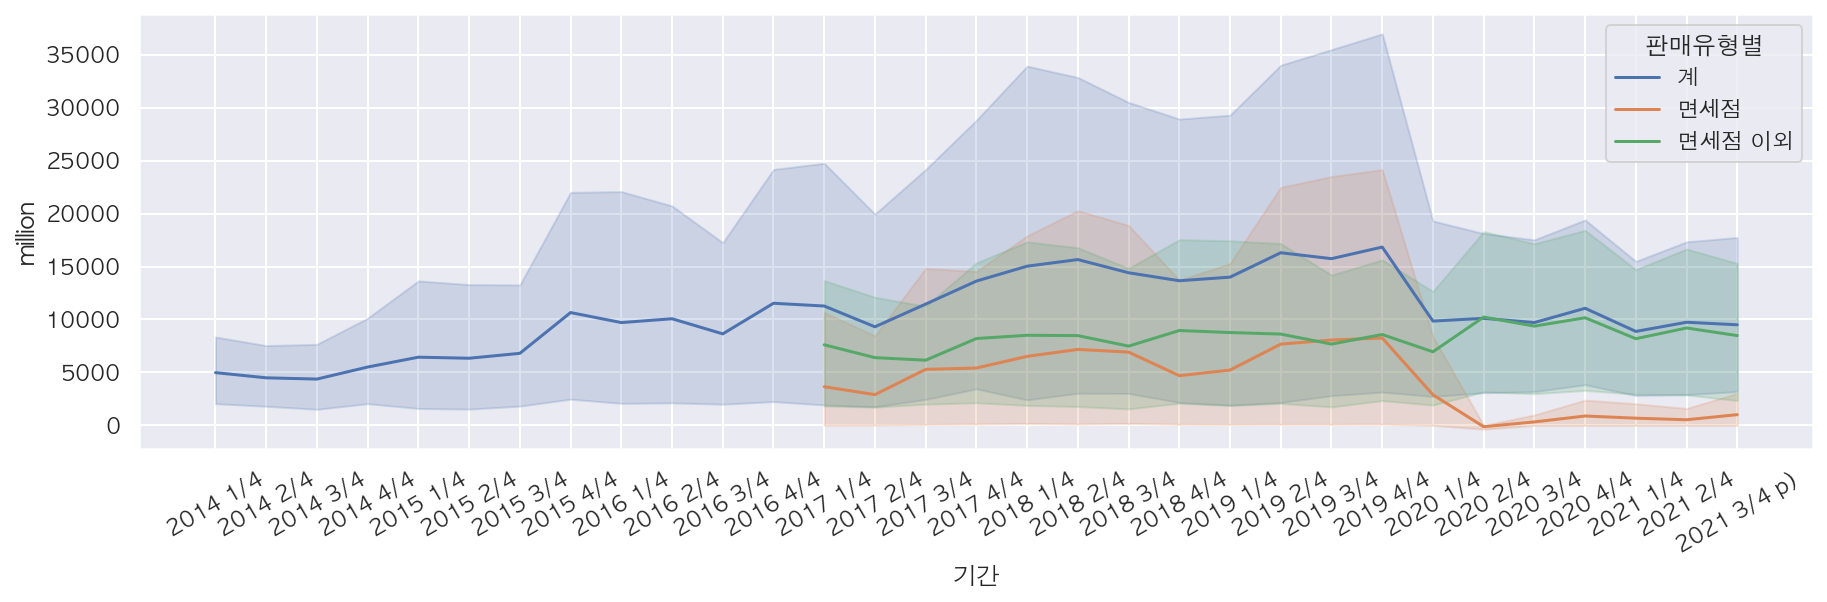

In [47]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)

sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

- __result__
    - 성장후 감소

<AxesSubplot:xlabel='기간', ylabel='million'>

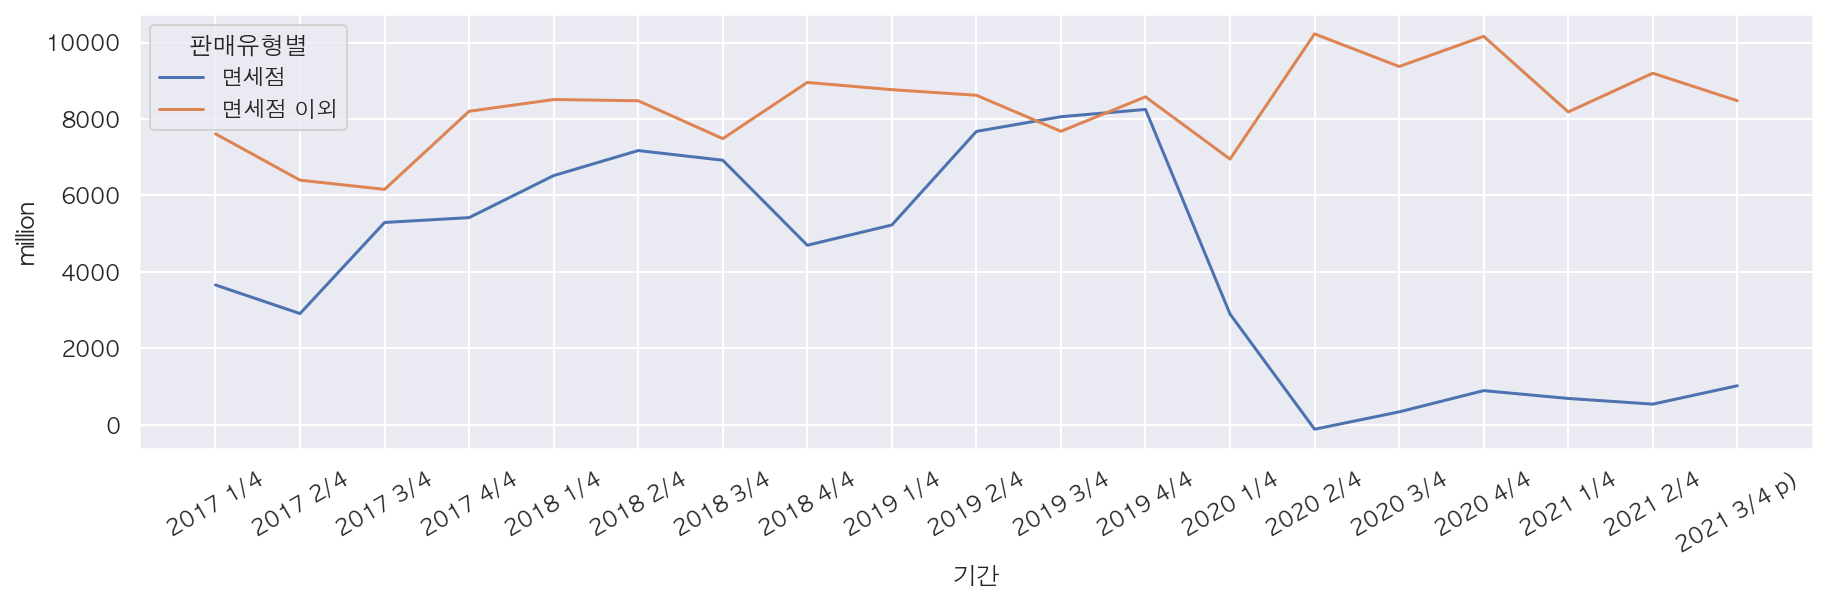

In [48]:
# "계"를 제거 후 

df_fashion2 = df[(df["상품군별"].str.contains("의류")) & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)

sns.lineplot(data=df_fashion2, x="기간", y="million", hue="판매유형별", ci=None)

### 데이터 집계하기

In [49]:
df_fashion2

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
113,중국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
157,일본,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
13838,중남미,의류 및 패션 관련상품,면세점 이외,2021 3/4 p),182.0,2021,3
13882,대양주,의류 및 패션 관련상품,면세점,2021 3/4 p),1.0,2021,3
13883,대양주,의류 및 패션 관련상품,면세점 이외,2021 3/4 p),1252.0,2021,3
13927,기타,의류 및 패션 관련상품,면세점,2021 3/4 p),75.0,2021,3


In [50]:
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="million", 
    columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,28774.0,47802.0,12950.0,15468.0,11792.0
대양주,3392.0,2349.0,3401.0,4532.0,5450.0,4978.0,7372.0,6986.0
미국,33223.0,38066.0,48451.0,100706.0,95750.0,111072.0,162594.0,124738.0
아세안(ASEAN),14936.0,19639.0,24478.0,45342.0,46136.0,62494.0,78626.0,46764.0
유럽연합(EU),4485.0,3374.0,4899.0,7472.0,8228.0,7388.0,10090.0,8586.0
일본,48960.0,57594.0,79905.0,181168.0,273600.0,269274.0,241634.0,171246.0
중국,57531.0,142339.0,190932.0,450814.0,577696.0,660534.0,212636.0,132586.0
중남미,975.0,616.0,649.0,1524.0,1152.0,1088.0,1222.0,1028.0
중동,1172.0,1018.0,968.0,1544.0,1758.0,1902.0,3534.0,2346.0


In [51]:
df_fashion["판매유형별"].value_counts()

면세점 이외    279
면세점       279
계         279
Name: 판매유형별, dtype: int64

In [52]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="million", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,28774.0,47802.0,12950.0,15468.0,11792.0
대양주,3392.0,2349.0,3401.0,4532.0,5450.0,4978.0,7372.0,6986.0
미국,33223.0,38066.0,48451.0,100706.0,95750.0,111072.0,162594.0,124738.0
아세안(ASEAN),14936.0,19639.0,24478.0,45342.0,46136.0,62494.0,78626.0,46764.0
유럽연합(EU),4485.0,3374.0,4899.0,7472.0,8228.0,7388.0,10090.0,8586.0
일본,48960.0,57594.0,79905.0,181168.0,273600.0,269274.0,241634.0,171246.0
중국,57531.0,142339.0,190932.0,450814.0,577696.0,660534.0,212636.0,132586.0
중남미,975.0,616.0,649.0,1524.0,1152.0,1088.0,1222.0,1028.0
중동,1172.0,1018.0,968.0,1544.0,1758.0,1902.0,3534.0,2346.0


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

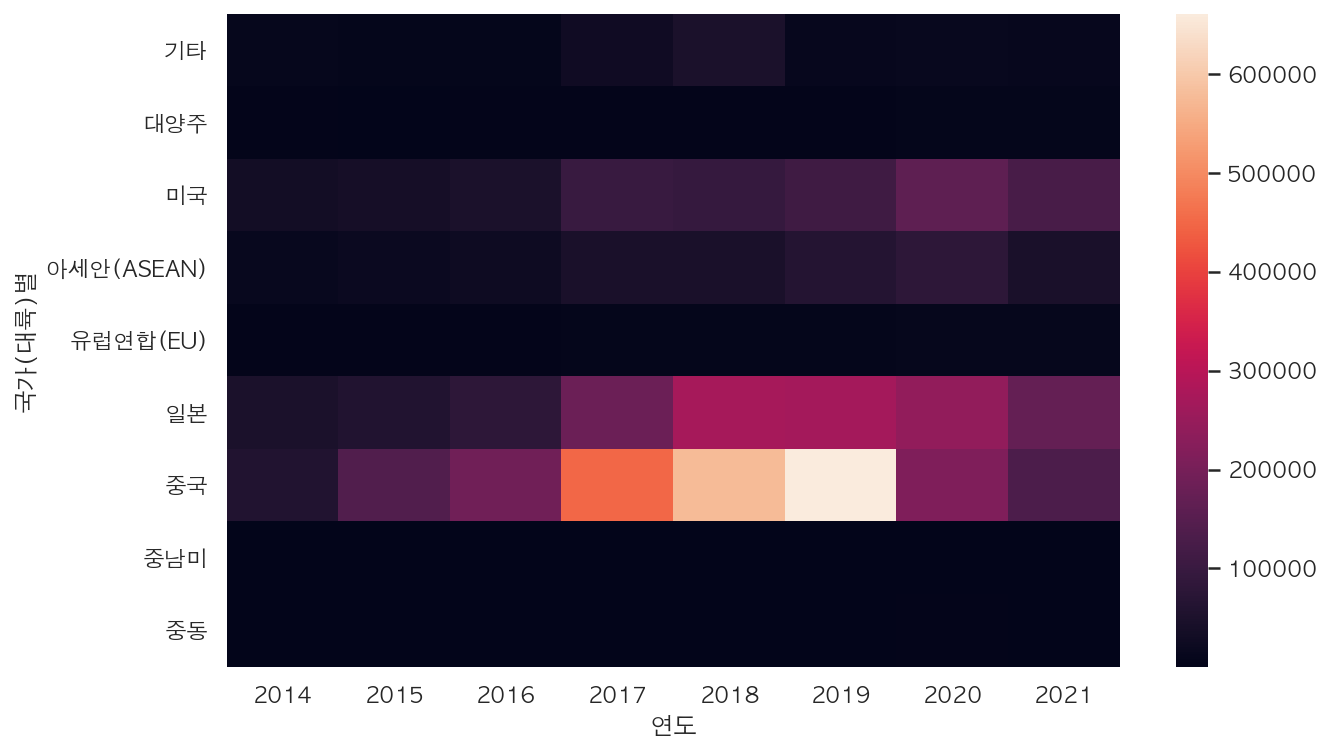

In [53]:
# heatmap을 그려보면 온라인에서 판매가 상당히 많이 일어난다는 것을 알 수 있습니다.
# vmax는 시각화를 할 때 나타내는 최대값입니다. 
# 이번에는 vmax와 vmin의 기본값을 그대로 사용해보겠습니다.

plt.figure(figsize=(10, 6))

sns.heatmap(result)

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

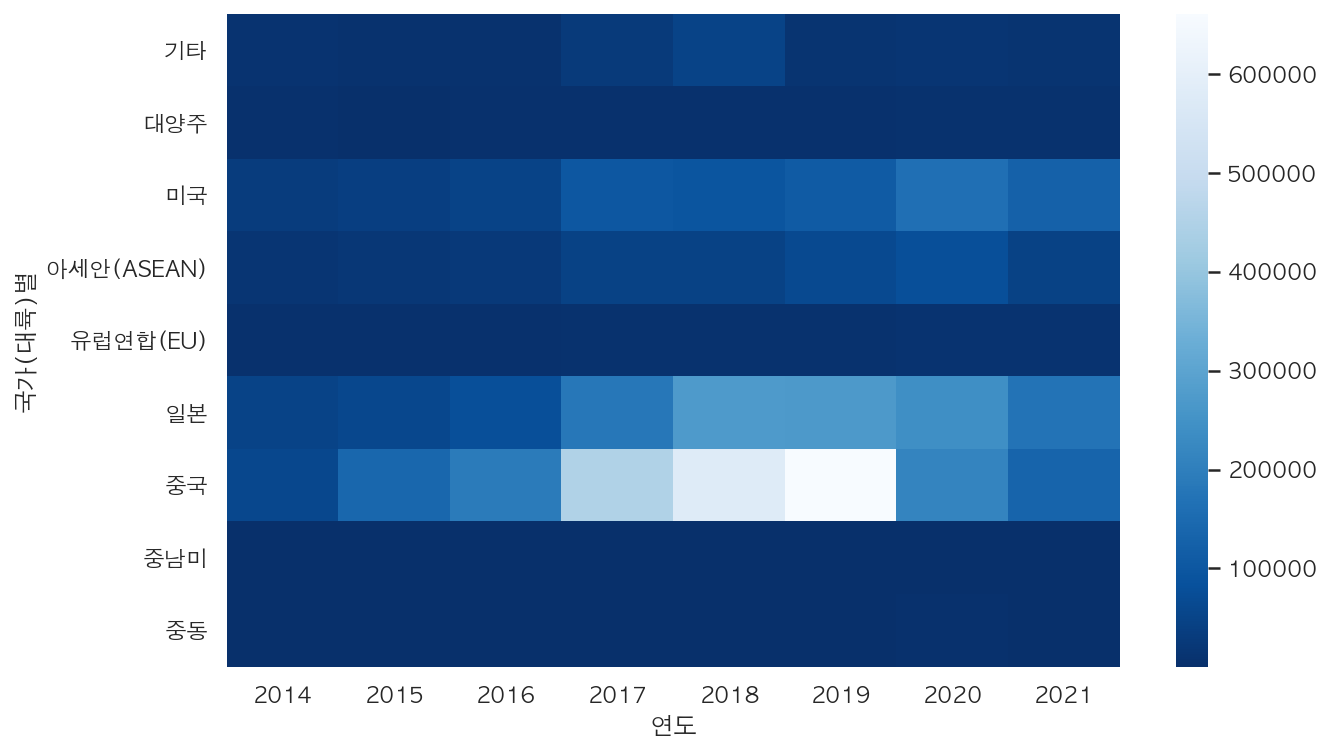

In [54]:
# cmap 옵션으로 색상 변경

plt.figure(figsize=(10, 6))

sns.heatmap(result, cmap = "Blues_r")

### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

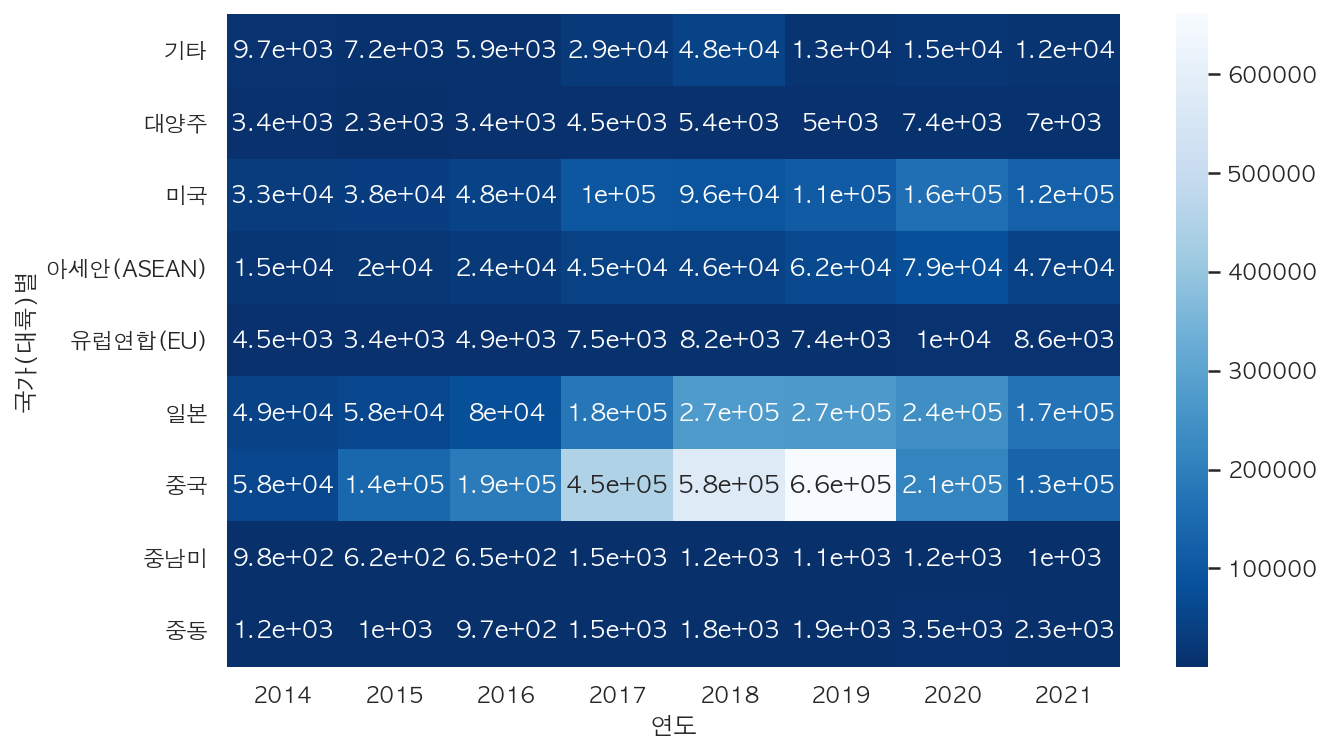

In [55]:
# annot 옵션으로 수치를 표시
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap = "Blues_r", annot=True)

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

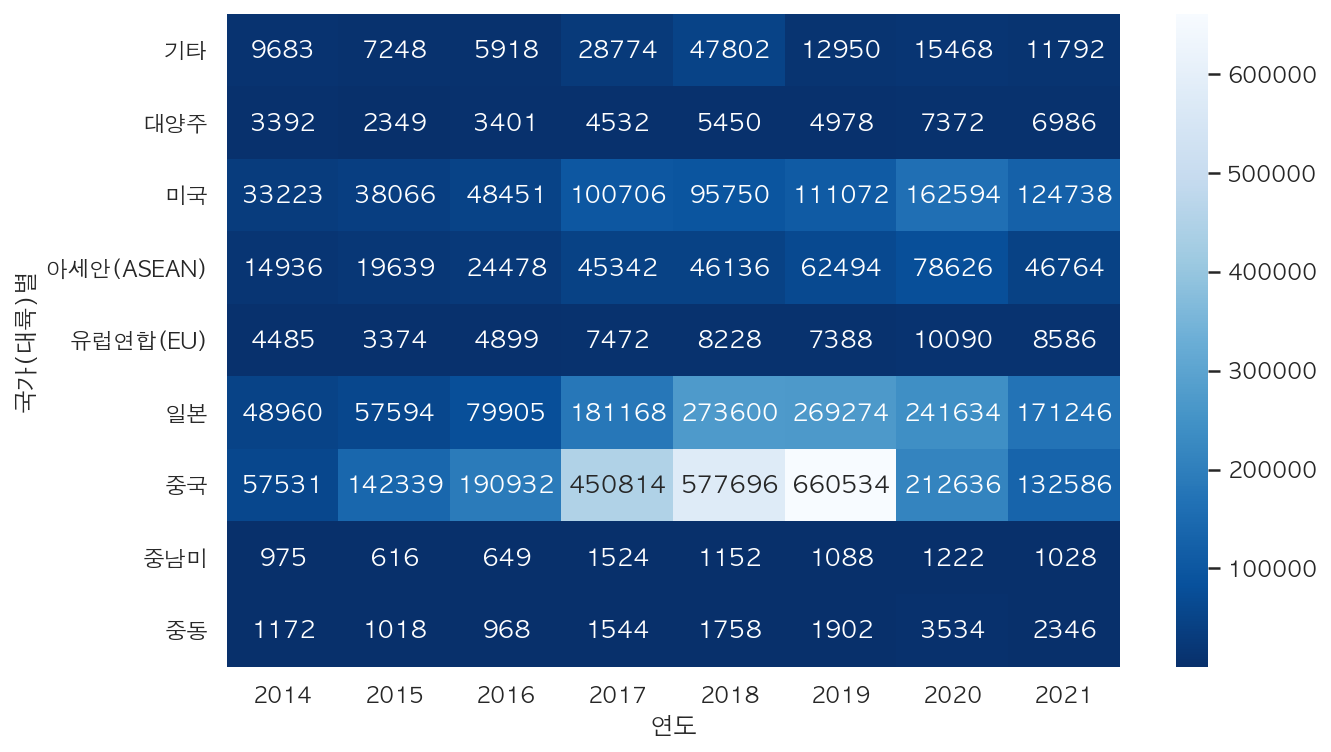

In [56]:
# fmt 옵션으로 소숫점 없이 float형의 숫자를 나타낼 수 있습니다.
# 중국에서 구매액이 가장 많습니다. 미국과 일본에서도 구매액이 늘어나고 있습니다.
# 연도, 대륙 별로 같이 볼 수 있습니다. 
# pivot table로는 분포를 보기는 어려운데 heatmap에서는 분포를 색상으로 편하게 볼 수 있습니다.


plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues_r", annot=True, fmt=".0f")

In [57]:
# 판매유형별이 "계"인 데이터만 모인 데이터프레임을 활용

df_total

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
13935,기타,아동·유아용품,계,2021 3/4 p),917.0,2021,3
13938,기타,음·식료품,계,2021 3/4 p),46.0,2021,3
13941,기타,농축수산물,계,2021 3/4 p),0.0,2021,3
13944,기타,생활용품 및 자동차용품,계,2021 3/4 p),369.0,2021,3


<AxesSubplot:xlabel='연도', ylabel='million'>

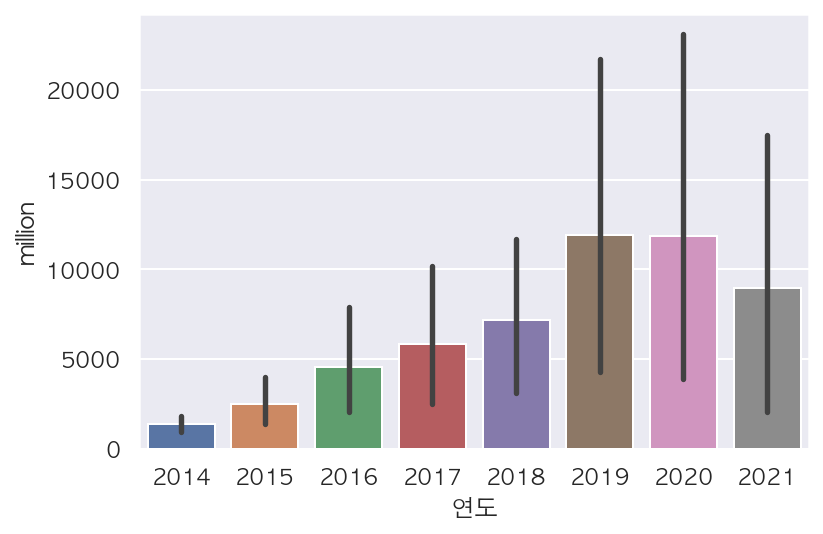

In [58]:
# 그래프를 보면 판매액이 증가하다 감소 합니다.
# estimator라는 옵션은 기본으로 mean(평균) 값을 구합니다.

sns.barplot(data=df_total,x="연도", y="million")

<AxesSubplot:xlabel='연도', ylabel='million'>

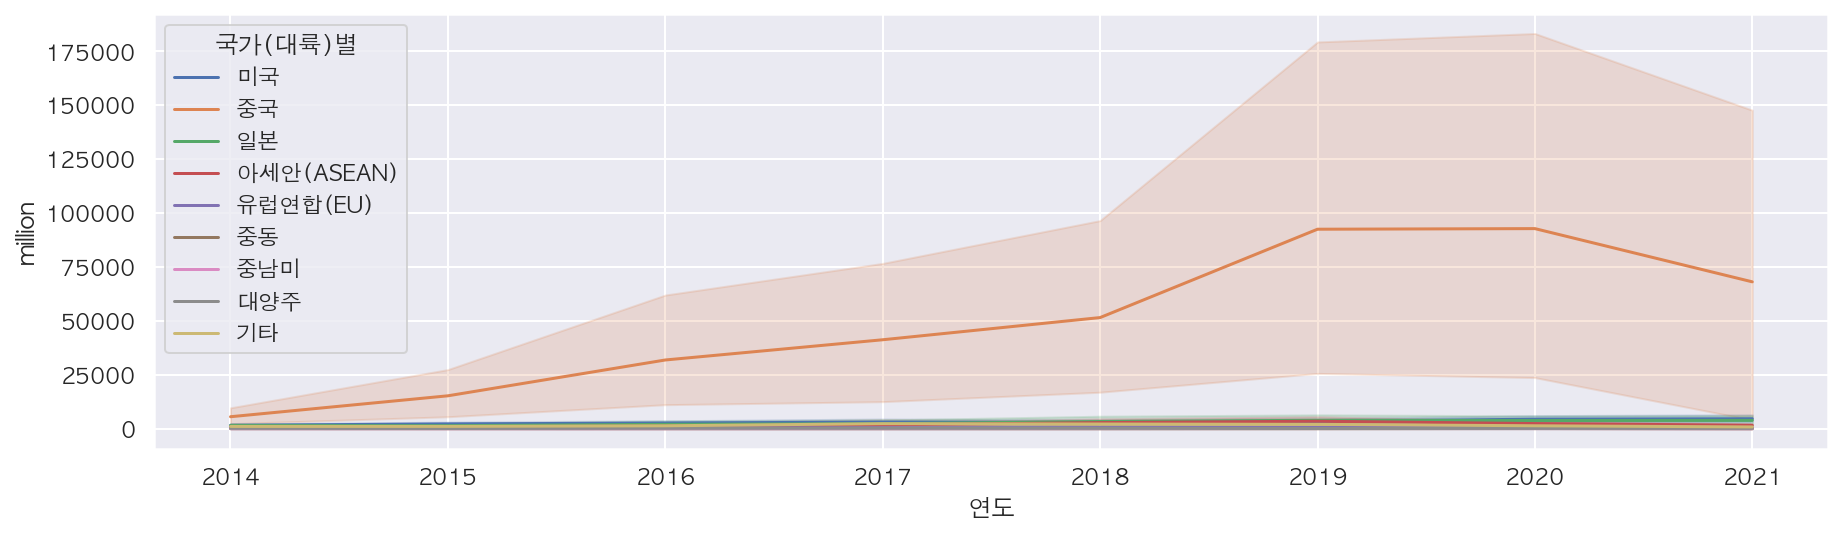

In [59]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="million", hue="국가(대륙)별")

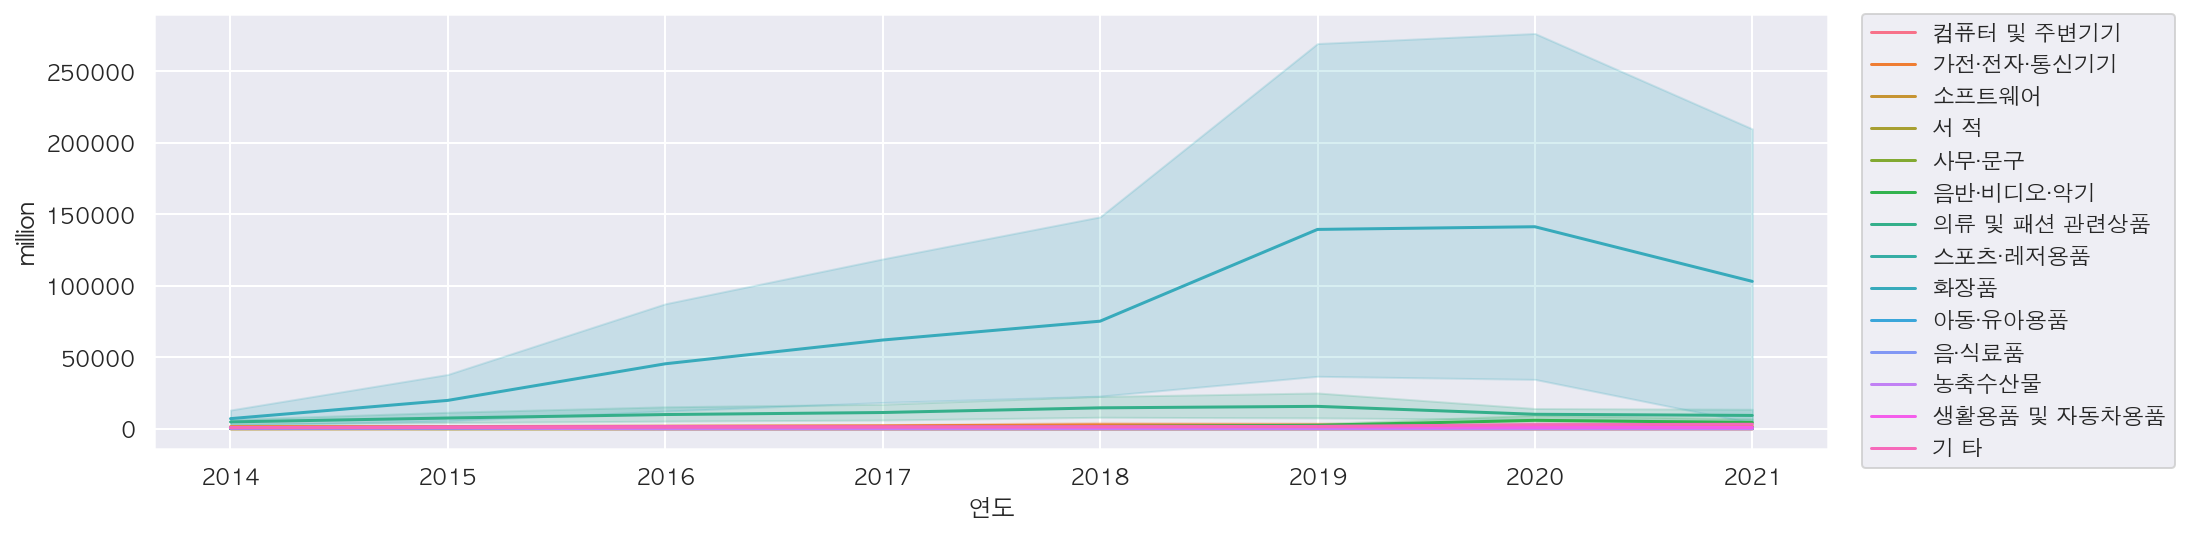

In [60]:
# legend 그래프를 밖에 그리기 위해 plt.legend() 함수를 사용합니다.
# bbox_to_anchor를 변경하면 그래프와 범례 사이의 간격을 조절할 수 있습니다.
# 그래프의 가장 위에 있는 데이터는 화장품입니다.


plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="million", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

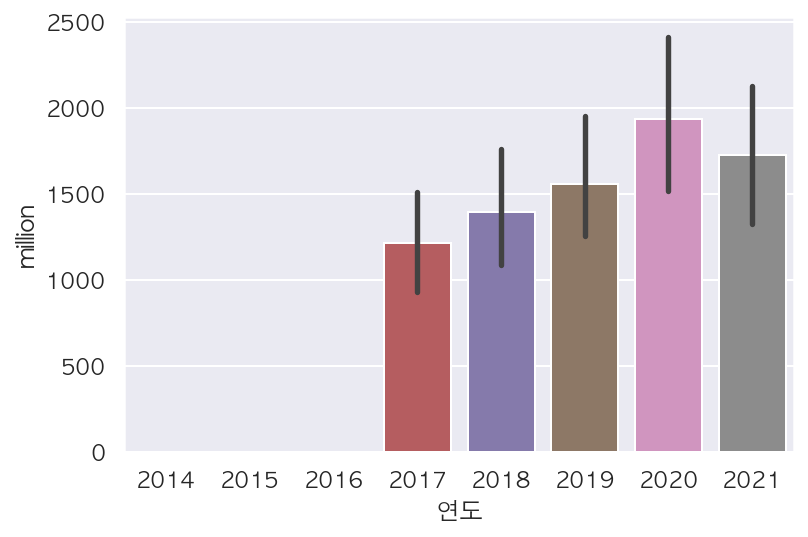

In [61]:
# df_sub 데이터프레임을 이용하여 분석

sns.barplot(x="연도", y="million", data=df_sub)

<AxesSubplot:xlabel='연도', ylabel='million'>

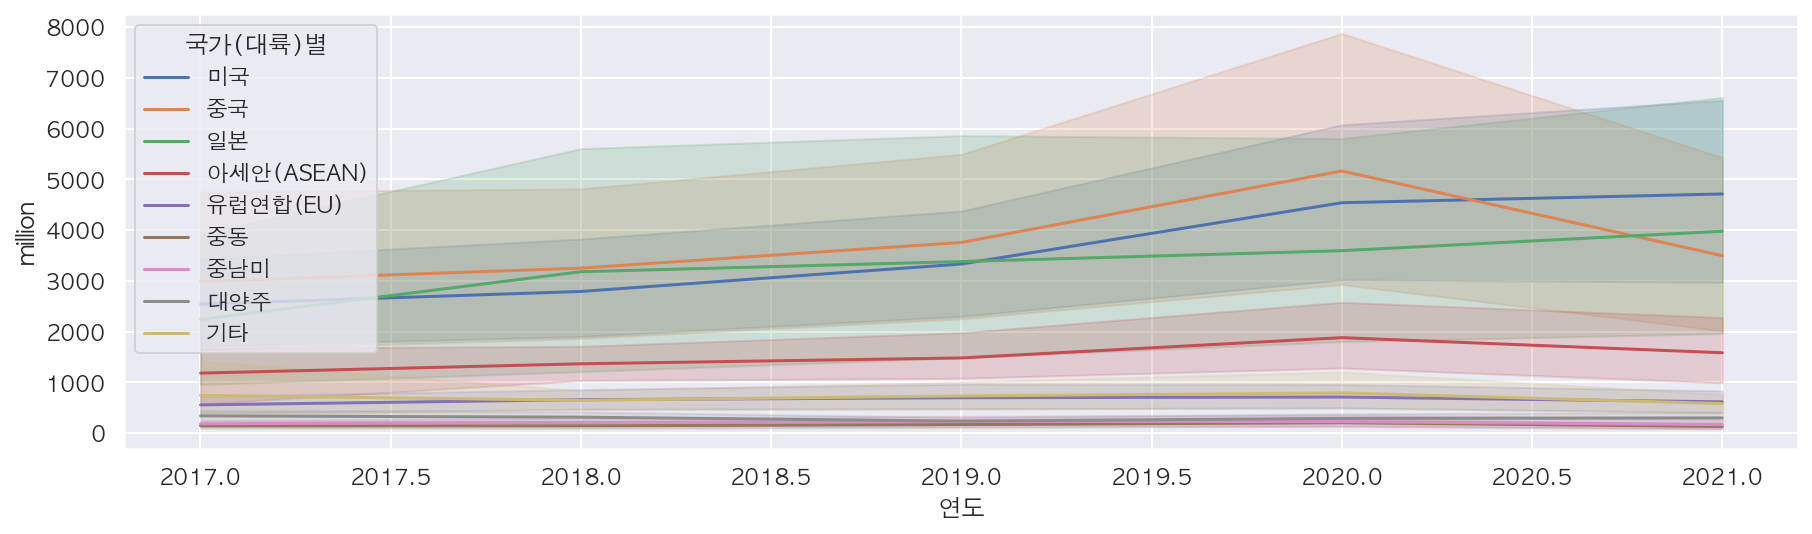

In [62]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

<AxesSubplot:xlabel='연도', ylabel='million'>

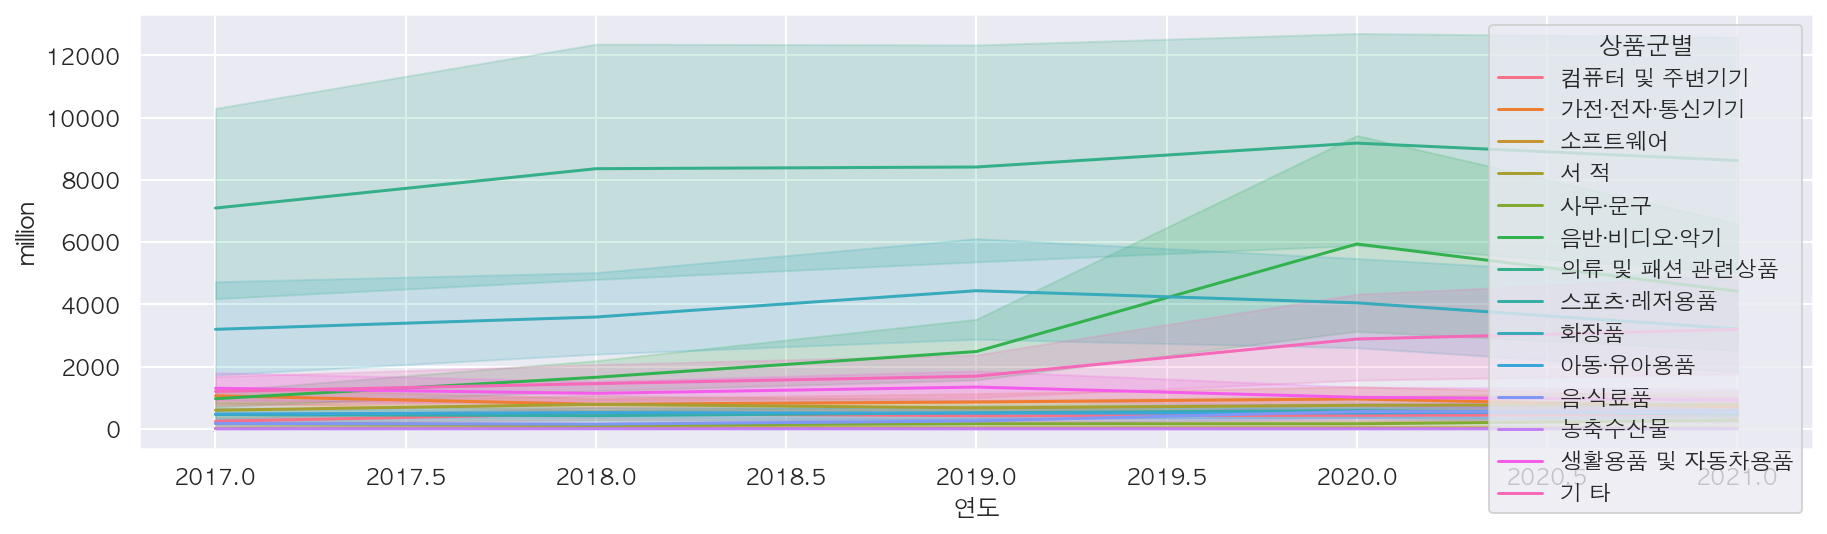

In [63]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")